# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работы: 
- Изучение общей информации о данных
- Предобработка данных
- Исследовательский анализ данных

###  <span style="font-size: 1.5em;">Откройте файл с данными и изучите общую информацию.</span> 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='	')
#Посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    font-size: 1.1em;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
Видим столбцы, которые имеют неподходящий тип данных, например тип данных в first_day_exposition стоит заменить на datetime.
Решим данную пролему на этапе предобработки даннх.
<div>

In [4]:
#Взглянем подробнее на первые 10 строчек
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


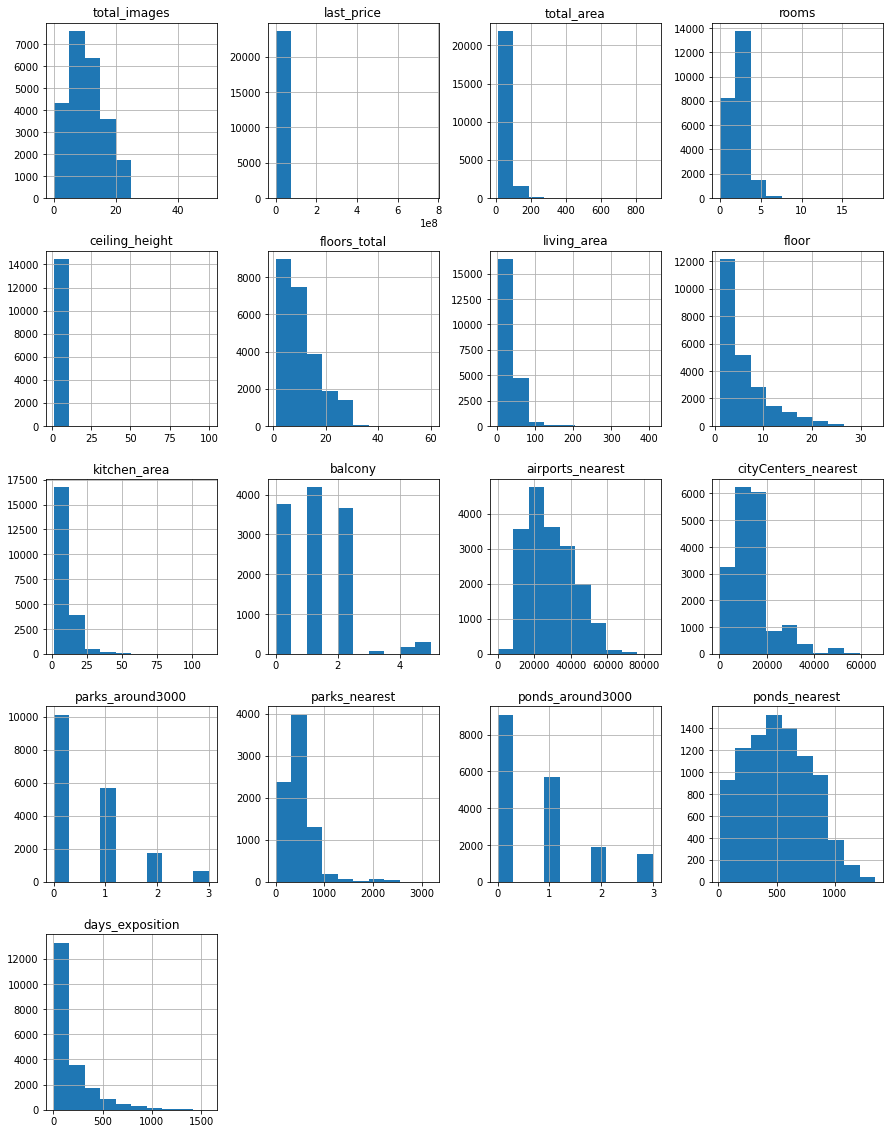

In [5]:
#Построим гистограммы по каждому столбцу
data.hist(figsize=(15, 20))
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    font-size: 1.1em;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
Видим странные значения 0 в столбце airports_nearest, а также значения 0 в столбце ponds_nearest
</div>    

###  <span style="font-size: 1.5em;">Предобработка данных</span>

In [6]:
#Посмотрим, сколько пропущеннх значений имеется в каждом столбце
for column in data.columns:
    missing_values_count = data[column].isna().sum()
    if missing_values_count == 0:
        print(f"Столбец {column}: не имеет пропущенных значений")
    else:
        print(f"Столбец {column}: имеет {missing_values_count} пропущенных значений")

Столбец total_images: не имеет пропущенных значений
Столбец last_price: не имеет пропущенных значений
Столбец total_area: не имеет пропущенных значений
Столбец first_day_exposition: не имеет пропущенных значений
Столбец rooms: не имеет пропущенных значений
Столбец ceiling_height: имеет 9195 пропущенных значений
Столбец floors_total: имеет 86 пропущенных значений
Столбец living_area: имеет 1903 пропущенных значений
Столбец floor: не имеет пропущенных значений
Столбец is_apartment: имеет 20924 пропущенных значений
Столбец studio: не имеет пропущенных значений
Столбец open_plan: не имеет пропущенных значений
Столбец kitchen_area: имеет 2278 пропущенных значений
Столбец balcony: имеет 11519 пропущенных значений
Столбец locality_name: имеет 49 пропущенных значений
Столбец airports_nearest: имеет 5542 пропущенных значений
Столбец cityCenters_nearest: имеет 5519 пропущенных значений
Столбец parks_around3000: имеет 5518 пропущенных значений
Столбец parks_nearest: имеет 15620 пропущенных значен

In [7]:
#Посмотрим, сколько % пропущеннх значений имеется в каждом столбце
for column in data.columns:
    missing_values_count = data[column].isna().sum()
    missing_values_percentage =  (missing_values_count / data.shape[0] * 100).round(2)
    print(f"Столбец {column}: имеет {missing_values_percentage}% пропущенных значений")

Столбец total_images: имеет 0.0% пропущенных значений
Столбец last_price: имеет 0.0% пропущенных значений
Столбец total_area: имеет 0.0% пропущенных значений
Столбец first_day_exposition: имеет 0.0% пропущенных значений
Столбец rooms: имеет 0.0% пропущенных значений
Столбец ceiling_height: имеет 38.8% пропущенных значений
Столбец floors_total: имеет 0.36% пропущенных значений
Столбец living_area: имеет 8.03% пропущенных значений
Столбец floor: имеет 0.0% пропущенных значений
Столбец is_apartment: имеет 88.29% пропущенных значений
Столбец studio: имеет 0.0% пропущенных значений
Столбец open_plan: имеет 0.0% пропущенных значений
Столбец kitchen_area: имеет 9.61% пропущенных значений
Столбец balcony: имеет 48.61% пропущенных значений
Столбец locality_name: имеет 0.21% пропущенных значений
Столбец airports_nearest: имеет 23.38% пропущенных значений
Столбец cityCenters_nearest: имеет 23.29% пропущенных значений
Столбец parks_around3000: имеет 23.28% пропущенных значений
Столбец parks_neares

In [8]:
#Проверим, есть ли явные дупликаты
data.duplicated().sum()

0

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<span style="font-size: 1.2em;"><b>Выводы:</b></span>
    
1. <b>balcony</b>:

Заменим пропущенные значения нулем, предполагая, что отсутствие информации означает отсутствие балконов.

2. <b>is_apartment</b>: 20924 пропущенных значений.

Возможно это поле было необязательным для заполнения, допустим, что ,не заполняя поле, люди подразумевали квартиру, заменим пропущенные значения "False".

3. <b>ceiling_height</b>:

Логично заменить на медиану по населенному пункту. 

4. Пропуски в <b>airports_nearest</b>, <b>parks_around3000</b>, <b>parks_nearest</b>, <b>ponds_around3000</b>, <b>ponds_nearest</b>, <b>days_exposition</b> нельзя ничем заменить, оставим как есть.
5. Пропуски в <b>locality_name</b> очень мало, удалим все строки содержащие пропуски
6. Пропуски в <b>floors_total</b> очень мало, удалим все строки содержащие пропуски
7. <b>cityCenters_nearest</b>:

Нужно посмотреть данные по каждому нас. пункту и заменить на медианные значения для каждого нас. пункта

8. <b>living_area</b>:

Проверим корреляцию и ,в случае зависимости, найдем коэф, как медианное значение отношения total_area к living_area, и заменим пропуски путем деления total_area на коэф.

9. <b>kitchen_area</b>:

Логично заменить на медиану по категориям общей площади.
</div>

####  <span style="font-size: 1.3em;">Замена пропущенных значений в столбцах</span>

<b>Заполнение пропусков в balcony</b>

In [9]:
#Заменим все пропуски в столбце balcony на 0
data['balcony'].fillna(0, inplace=True)
print(data['balcony'].isna().sum())

0


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в cityCenters_nearest</b>
</div>

In [10]:
#Посмотрим, сколько пропусков имеется 
data['cityCenters_nearest'].isna().sum()

5519

In [11]:
#Подсчитаем пропущенные значения для каждого населенного пункта и сортируем по убыванию
(data
 .groupby('locality_name')['cityCenters_nearest']
 .apply(lambda x: x.isna().sum())
 .sort_values(ascending=False)
 .head(25)
)

locality_name
посёлок Мурино               522
Всеволожск                   398
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
деревня Старая                64
Санкт-Петербург               61
городской посёлок Янино-1     61
Шлиссельбург                  57
Луга                          56
Name: cityCenters_nearest, dtype: int64

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
Наблюдается значительное кол-во пропусков в деревнях и поселках

Это может быть связано с трудностью предоставить объективную информацию для маленьких населенных пунктов, в которых нет объективного центра.

В Санкт-Петербурге кол-во пропусков принебрежимо мало
</div>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в floors_total</b>
</div>

In [12]:
#Посмотрим, сколько % составляют пропуски в столбце floors_total от общего кол-ва объявлений
(data['floors_total'].isna().sum() / data['floors_total'].count()) * 100

0.36420615762503705

In [13]:
#Удалим все строки с пропуском в floors_total
data.dropna(subset=['floors_total'] ,inplace=True)
print(data['floors_total'].isna().sum())

0


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в ceiling_height</b>
</div>

In [14]:
#Посмотрим, сколько пропусков имеется 
data['ceiling_height'].isna().sum()

9118

In [15]:
#Пропусков много, создадим словарь с медианными значениями высот потолков для каждого населенного пункта
median_ceiling_heights = data.groupby('locality_name')['ceiling_height'].median().to_dict()
median_ceiling_heights

{'Бокситогорск': 3.9,
 'Волосово': 2.5,
 'Волхов': 2.58,
 'Всеволожск': 2.7,
 'Выборг': 2.55,
 'Высоцк': 2.5,
 'Гатчина': 2.55,
 'Зеленогорск': 2.55,
 'Ивангород': 2.52,
 'Каменногорск': 2.6,
 'Кингисепп': 2.5,
 'Кириши': 2.5,
 'Кировск': 2.5,
 'Колпино': 2.5,
 'Коммунар': 2.5599999999999996,
 'Красное Село': 2.6,
 'Кронштадт': 2.55,
 'Кудрово': 2.73,
 'Лодейное Поле': 2.55,
 'Ломоносов': 2.55,
 'Луга': 2.5,
 'Любань': 2.5,
 'Мурино': 2.7,
 'Никольское': 2.56,
 'Новая Ладога': 2.5,
 'Отрадное': 2.55,
 'Павловск': 2.6,
 'Петергоф': 2.55,
 'Пикалёво': 2.6,
 'Подпорожье': 2.55,
 'Приморск': 2.5,
 'Приозерск': 2.5,
 'Пушкин': 2.6,
 'Санкт-Петербург': 2.7,
 'Светогорск': 2.5,
 'Сертолово': 2.6,
 'Сестрорецк': 2.7,
 'Сланцы': 2.5,
 'Сосновый Бор': 2.5,
 'Сясьстрой': 2.55,
 'Тихвин': 2.6,
 'Тосно': 2.5,
 'Шлиссельбург': 2.5,
 'городской поселок Большая Ижора': 2.575,
 'городской поселок Янино-1': 2.725,
 'городской посёлок Будогощь': 2.615,
 'городской посёлок Виллози': 2.6,
 'городской посёл

In [16]:
#Создадим функцию, которая заменит пропуски на медиану по нас. пункту
def fill_ceiling_height(row):
    if pd.isna(row['ceiling_height']):
        return median_ceiling_heights.get(row['locality_name'], row['ceiling_height'])
    return row['ceiling_height']

data['ceiling_height'] = data.apply(fill_ceiling_height, axis=1)

In [17]:
#Проверим наши результаты
data['ceiling_height'].isna().sum()

154

In [18]:
#Остались 154 пропущенных значений, посмотрим, сколько уникальных названий населенных пунктов в них входит
len(data[data['ceiling_height'].isna()]['locality_name'].unique())

82

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
Вероятнее всего, среди этих населенных пунктов нет значений высот потолков, поэтому и невозможно посчитать медиану

Т.к. таких значений мало, их можно оставить, беря во внимание тот факт, что в малых нас. пунктах сложно объективно определить растояние до центра. Возможно, из-за этого факта и не указано значение растояния до центра
</div>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в locality_name</b>
</div>

In [19]:
#Посмотрим, сколько % составляют пропуски в столбце locality_name от общего кол-ва объявлений
(data['locality_name'].isna().sum() / data['locality_name'].count()) * 100

0.20369191597708466

In [20]:
#Удалим все строки с пропуском в locality_name
data.dropna(subset=['locality_name'] ,inplace=True)
print(data['locality_name'].isna().sum())

0


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в lliving_area</b>
</div>

In [21]:
#Проверим, есть ли корреляция между общей площадью и жилой
data['total_area'].corr(data['living_area'])

0.9397711143610333

In [22]:
#Добавим столбец, в котором будут находится значения отношения total_area к living_area
data['tot/liv'] = data['total_area'] / data['living_area']

In [23]:
#Вычислим медианное значение нового столбца
coefficient = data['tot/liv'].mean().round(2)
coefficient

1.85

In [24]:
#Заполним все пропуски, поделив total_area на коэф.
data['living_area'] = data['living_area'].fillna(data['total_area'] / coefficient).round(2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,tot/liv
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.117647
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.615,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.172043
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.700,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1.632653
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.700,14.0,85.95,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700,5.0,73.30,3,NaN,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,1.825512
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.500,5.0,38.00,4,NaN,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,1.552632
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.909091
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000,17.0,41.49,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,NaN


In [25]:
data['living_area'].isna().sum()

0

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в kitchen_area</b>

Создадим отдельный столбец с категориями квартир по общей площади:
1. до 40м²
2. от 40м² до 50м²
3. от 50м² до 70м²
4. больше 70м²

Затем посчитаем медианное значение площади кухни для каждой категории и заполним пропуски исходя из категории
</div>

In [26]:
#Посмотрим, сколько пропусков еасть в kitchen_area
data['kitchen_area'].isna().shape[0]

23565

In [27]:
#Есть ли корреляция между total_area и kitchen_area?
data['total_area'].corr(data['kitchen_area'])

0.6092476784548312

In [28]:
#Создадим функцию для определения категории
def categorize_by_total_area(total_area):
    if total_area < 40:
        return 'до 40м²'
    elif total_area < 50:
        return 'от 40м² до 50м²'
    elif total_area < 70:
        return 'от 50м² до 70м²'
    else:
        return 'больше 70м²'

In [29]:
#Применим функцию к столбцу и создадим новый столбец с категориями
data['total_area_category'] = data['total_area'].apply(categorize_by_total_area)

In [30]:
#Группировка по категориям и вычисление медианных значений для kitchen_area
median_kitchen_by_category = data.groupby('total_area_category')['kitchen_area'].median()
median_kitchen_by_category

total_area_category
больше 70м²        13.0
до 40м²             8.1
от 40м² до 50м²     8.0
от 50м² до 70м²     9.0
Name: kitchen_area, dtype: float64

In [31]:
#Создадим список пропущенных значений kitchen_area, для будущей проверки
kitchen_area_na = data['kitchen_area'].isna()

In [32]:
#Заполним пропущенные значения в kitchen_area медианными значениями по категориям
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area_category'].map(median_kitchen_by_category))
data[kitchen_area_na][['kitchen_area', 'total_area_category', 'total_area']].head(10)

,kitchen_area,total_area_category,total_area
3,13.0,больше 70м²,159.0
30,8.1,до 40м²,32.8
37,8.0,от 40м² до 50м²,45.8
44,8.0,от 40м² до 50м²,40.0
59,8.0,от 40м² до 50м²,46.5
60,8.1,до 40м²,35.0
81,9.0,от 50м² до 70м²,68.0
82,13.0,больше 70м²,80.5
133,8.1,до 40м²,31.0
144,8.1,до 40м²,27.0


In [33]:
data['kitchen_area'].isna().sum()

0

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Заполнение пропусков в is_apartment</b>
</div>

In [34]:
#Заполним пропуски в 'is_apartment' на False
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

#### <span style="font-size: 1.3em;">Изменение типов данных</span>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
* Тип данных в **first_day_exposition** нужно изменить с object на daytime
* Тип данных в **floors_total** нужно изменить с float на int, т.к. число этажей должно иметь целочисленное значение.
* Тип данных в **balcony** нужно изменить с float на int, т.к. число балконов должно иметь целочисленное значение.
* Тип данных в **parks_around3000** нужно изменить с float на int, т.к. число парков должно иметь целочисленное значение.
* Тип данных в **ponds_around3000** нужно изменить с float на int, т.к. число водоемов должно иметь целочисленное значение.
    
</div>

In [35]:
#Заменяем float на int в floors_total, balcony, parks_around3000, ponds_around3000
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          Int64
parks_nearest           float64
ponds_around3000          Int64
ponds_nearest           float64
days_exposition         float64
tot/liv                 float64
total_area_category      object
dtype: object

In [36]:
#Заменяем тип object на daytime в first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                float64
tot/liv                        float64
total_area_category             object
dtype: object

In [37]:
#Убедимся в изменениях
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,tot/liv,total_area_category
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2.117647,больше 70м²
1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.60,1,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2.172043,от 40м² до 50м²
2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,1.632653,от 50м² до 70м²
3,0,64900000.0,159.00,2015-07-24,3,2.700,14,85.95,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,больше 70м²
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3.125000,больше 70м²
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700,5,73.30,3,False,...,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,1.825512,больше 70м²
23695,14,3100000.0,59.00,2018-01-15,3,2.500,5,38.00,4,False,...,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,1.552632,от 50м² до 70м²
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,село Рождествено,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,1.909091,от 50м² до 70м²
23697,13,11475000.0,76.75,2017-03-28,2,3.000,17,41.49,12,False,...,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,NaN,больше 70м²


#### <span style="font-size: 1.3em;">Изучение уникальных значений в locality_name</span>

In [38]:
#Просмотрим уникальные названия населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [39]:
#Заменим все буквы 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Хорошо, что тобою было замечено разное написание слова «посёлок» и было принято решение это исправить 😃

</div>

In [40]:
#Создадим список приставок к населенным пунктам и уберем их через цикл
words_to_remove = ['поселок', 'городской поселок', 'деревня', 'садовое товарищество', 'село', 'поселок станции', 'коттеджный поселок', 'городского типа', 'при железнодорожной станции', 'станции', 'коттеджный', 'садоводческое некоммерческое товарищество', 'городской']
for word in words_to_remove:
    data['locality_name'] = data['locality_name'].str.replace(word, '').str.strip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### <span style="font-size: 1.3em;">Обработка аномалий и выбросов</span>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
Еще раз взглянем на гистограммы, построенные в самом начале исследования 


Некоторые графики кажутся подозрительными на выбросы, такие как: 
* total_area
* rooms
* celing_height
* floors_total
* living_area
* floor
* airports_nearest
* balcony
* kitchen_area
* total_images


Взглянем отдельно по каждому столбцу
</div>

<b>Обработка аномалий и выбросов ceiling_height</b>

In [41]:
#Посмотрим статистику по высоте потолков
data['ceiling_height'].describe()

count    23445.000000
mean         2.733913
std          1.014787
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

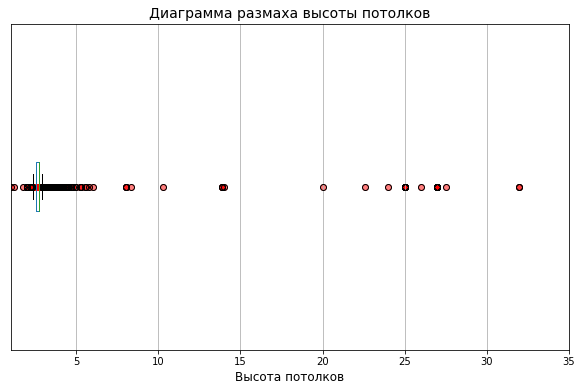

In [42]:
#Построим диаграмму размаха
data.boxplot(column='ceiling_height', figsize=(10, 6), vert=False)
plt.xlim(1, 35)
plt.xlabel('Высота потолков', fontsize=12)
plt.yticks([])
plt.title('Диаграмма размаха высоты потолков', fontsize=14)

#Добавляем точки данных для выявления выбросов
plt.scatter(x=data['ceiling_height'], y=np.repeat(1, len(data['ceiling_height'])), color='red', alpha=0.5)

plt.show()

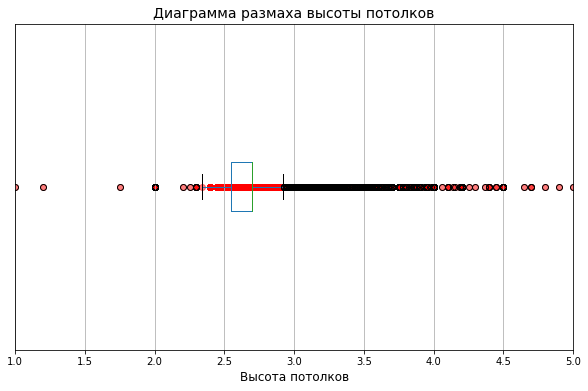

In [43]:
#Построим диаграмму размаха в другом масштабе
data.boxplot(column='ceiling_height', figsize=(10, 6), vert=False)
plt.xlim(1, 5)
plt.xlabel('Высота потолков', fontsize=12)
plt.yticks([])
plt.title('Диаграмма размаха высоты потолков', fontsize=14)
plt.scatter(x=data['ceiling_height'], y=np.repeat(1, len(data['ceiling_height'])), color='red', alpha=0.5)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Логично предположить, что значения в диапазоне 25-35 записаны неверно. Стоит поделить данные значения на 10 <br>
Выбросами будем считать значения до 2м, в диапазоне 6-25 и 100м.
</div>

In [44]:
#Обновляем значения в диапазоне 25-35
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 35)]['ceiling_height'] / 10)

In [45]:
#Проверим, сколько % составляют ненужные строки
total_dropped_rows = (len(data[data['ceiling_height'] <= 2]) 
+ len(data[(data['ceiling_height'] >= 6) & (data['ceiling_height'] <= 25)]) + len(data[data['ceiling_height'] == 100]))
percentage_dropped = (total_dropped_rows / len(data)) * 100
print(f"Будет выброшено {total_dropped_rows} строк данных, что составляет {percentage_dropped:.2f}%")

Будет выброшено 28 строк данных, что составляет 0.12%


In [46]:
#Удаляем строки с выбросами
data = data[data['ceiling_height'] > 2]
data = data[(data['ceiling_height'] < 6) | (data['ceiling_height'] > 25)]
data = data[data['ceiling_height'] != 100]

In [47]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Нижняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1050000.0
Нижняя граница last_price 36000000.0
Процент отброшенных значений =  1.94 %


In [48]:
#Проверим, как изменилась наша статистика
data['ceiling_height'].describe()

count    23417.000000
mean         2.703930
std          0.225135
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<b>Обработка аномалий и выбросов rooms</b>

In [49]:
#Посмотрим статистику по комнатам
data['rooms'].describe()

count    23417.000000
mean         2.071914
std          1.080009
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

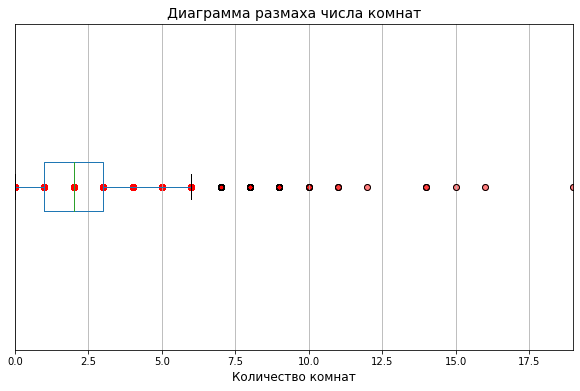

In [50]:
#Построим диаграмму размаха
data.boxplot(column='rooms', figsize=(10, 6), vert=False)
plt.xlim(0, 19)
plt.xlabel('Количество комнат', fontsize=12)
plt.title('Диаграмма размаха числа комнат', fontsize=14)
plt.yticks([])
plt.scatter(y=np.repeat(1, len(data['rooms'])), x=data['rooms'], color='red', alpha=0.5)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Странно видеть кол-во комнат 0. Такое возможно предположить только в случае студийной или свободной планировки

Проверим, сколько квартир с 0 комнатами являются либо студиями, либо имеют свободную планировку

Видны явные выбросы в кол-ве комнат больше 7
</div>

In [51]:
#Количество квартир со студийной или свободной планировкой
data.query('rooms == 0 and (studio == True or open_plan == True)').shape[0]

192

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
Кол-во таких объявлений мало
</div>

In [52]:
#Проверим, сколько квартир с 0 комнатами не являются ни студиями, ни имеют свободную планировку
data.query('rooms == 0 and studio == False and open_plan == False').shape[0]

0

In [53]:
#Посчитаем кол-во выбросов 
percentage_dropped = (data.query('rooms > 7').shape[0] / data.shape[0]) * 100
print(f"Будет выброшено {data.query('rooms > 7').shape[0]} строк данных, что составляет {percentage_dropped:.2f}%")

Будет выброшено 31 строк данных, что составляет 0.13%


In [54]:
#Хоть таких значений и мало, все равно логично выбросить их
data = data[data['rooms'] < 8]
data.query('rooms > 7').shape[0]

0

<b>Обработка аномалий и выбросов total_area</b>

In [55]:
#Посмотрим статистику по общей площади
data['total_area'].describe()

count    23386.000000
mean        60.069898
std         34.257561
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

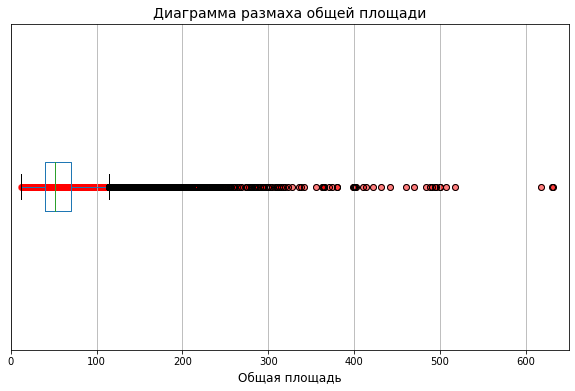

In [56]:
#Построим диаграмму размаха
data.boxplot(column='total_area', figsize=(10, 6), vert=False)
plt.xlim(0, 650)
plt.xlabel('Общая площадь', fontsize=12)
plt.title('Диаграмма размаха общей площади', fontsize=14)
plt.yticks([])
plt.scatter(y=np.repeat(1, len(data['total_area'])), x=data['total_area'], color='red', alpha=0.5)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Данные по общей площади не нуждаются в изменениях
</div>

<b>Обработка аномалий и выбросов floors_total</b>

In [57]:
#Посмотрим статистику по этажности зданий
data['floors_total'].describe()

count    23386.000000
mean        10.715984
std          6.593177
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

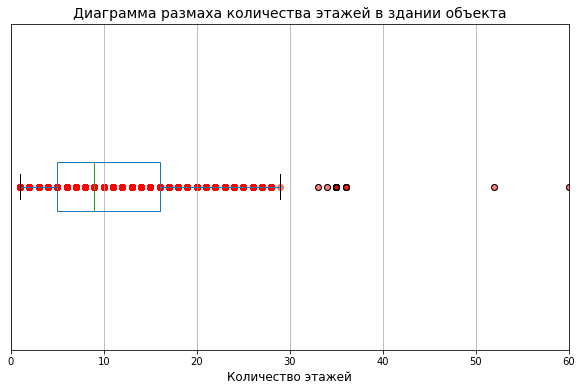

In [58]:
#Построим диаграмму размаха
data.boxplot(column='floors_total', figsize=(10, 6), vert=False)
plt.xlim(0, 60)
plt.xlabel('Количество этажей', fontsize=12)
plt.title('Диаграмма размаха количества этажей в здании объекта', fontsize=14)
plt.scatter(y=np.repeat(1, len(data['floors_total'])), x=data['floors_total'], color='red', alpha=0.5)
plt.yticks([])
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Данные по этажности зданий не нуждаются в изменениях
</div>

<b>Обработка аномалий и выбросов floor</b>

In [59]:
#Посмотрим статистику по этажам квартир
data['floor'].describe()

count    23386.000000
mean         5.896519
std          4.877668
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

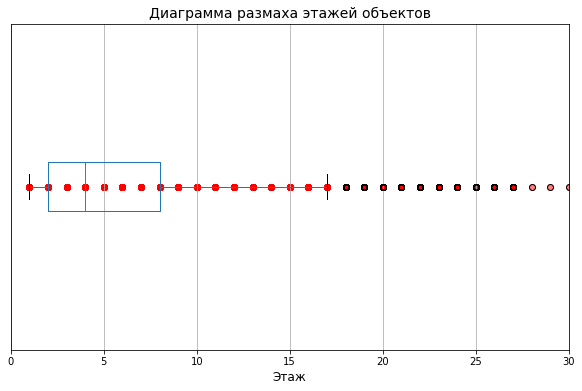

In [60]:
#Построим диаграмму размаха
data.boxplot(column='floor', figsize=(10, 6), vert=False)
plt.xlim(0, 30)
plt.xlabel('Этаж', fontsize=12)
plt.title('Диаграмма размаха этажей объектов', fontsize=14)
plt.scatter(x=data['floor'], y=np.repeat(1, len(data['floor'])), color='red', alpha=0.5)
plt.yticks([])
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Данные по этажам квартир не нуждаются в изменениях
</div>

<b>Обработка аномалий и выбросов airports_nearest</b>

In [61]:
#Посмотрим статистику по расстоянию до ближайшего аэропорта в метрах
data['airports_nearest'].describe()

count    17990.000000
mean     28805.703057
std      12639.587095
min          0.000000
25%      18557.000000
50%      26766.000000
75%      37288.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Видно странное значение минимума в 0 метров. Посмотрим сколько таких объявлений
</div>

In [62]:
data.query('airports_nearest == 0').shape[0]

1

In [63]:
#Выбросим это значение
data = data[data['airports_nearest'] != 0]

<b>Обработка аномалий и выбросов living_area</b>

In [64]:
#Посмотрим статистику по жилой площади в квадратных метрах
data['living_area'].describe()

count    23385.00000
mean        34.26962
std         21.41422
min          2.00000
25%         19.00000
50%         30.00000
75%         42.00000
max        347.50000
Name: living_area, dtype: float64

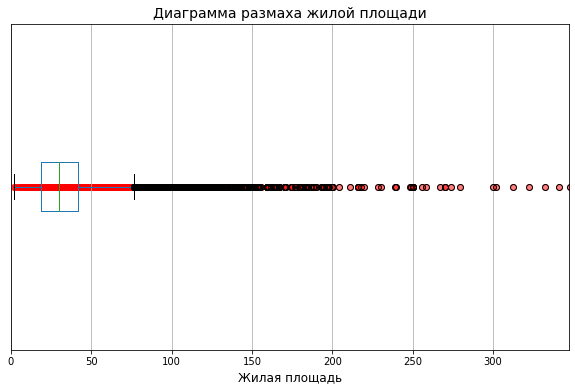

In [65]:
#Построим диаграмму размаха
data.boxplot(column='living_area', figsize=(10, 6), vert=False)
plt.xlim(0, 347)
plt.xlabel('Жилая площадь', fontsize=12)
plt.title('Диаграмма размаха жилой площади', fontsize=14)
plt.scatter(y=np.repeat(1, len(data['living_area'])), x=data['living_area'], color='red', alpha=0.5)
plt.yticks([])
plt.show()

In [66]:
#Значения меньше 9 кажутся подозрительными, взглянем на них отдельно
data.query('living_area < 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,tot/liv,total_area_category
114,5,4000000.0,21.4,2019-02-07,1,2.90,8,8.30,7,False,...,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN,2.578313,до 40м²
2309,10,4200000.0,62.4,2017-06-15,2,2.60,9,8.40,6,False,...,Шушары,23662.0,29448.0,0,NaN,0,NaN,111.0,7.428571,от 50м² до 70м²
3242,7,4440000.0,41.0,2017-07-02,1,2.70,17,3.00,17,False,...,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,13.666667,от 40м² до 50м²
12040,5,1900000.0,15.0,2018-06-27,1,2.50,5,8.11,1,False,...,Сосновый Бор,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,NaN,до 40м²
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.00,2,False,...,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,26.000000,от 50м² до 70м²
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.00,1,False,...,Санкт-Петербург,32177.0,4826.0,1,430.0,0,NaN,168.0,5.166667,до 40м²
16949,9,1550000.0,15.0,2018-08-21,1,2.70,9,8.11,1,False,...,Санкт-Петербург,51048.0,16376.0,0,NaN,1,1079.0,42.0,NaN,до 40м²
17248,20,5300000.0,33.0,2017-04-14,1,2.70,22,8.90,16,False,...,Санкт-Петербург,33803.0,13671.0,0,NaN,0,NaN,216.0,3.707865,до 40м²
17582,11,2680000.0,22.0,2018-08-11,0,2.70,25,5.00,8,False,...,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,4.400000,до 40м²
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9,7.03,1,False,...,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,410.0,NaN,до 40м²


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Кроме пары вбивающихся строчек (13915 и 23574), данные выглядят реалистично. Удалим эти 2 строки
</div>

In [67]:
data = data[data['living_area'] > 3]

<b>Обработка аномалий и выбросов balcony</b>

In [68]:
#Посмотрим статистику по балконам
data['balcony'].describe()

count    23381.000000
mean         0.594970
std          0.961722
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

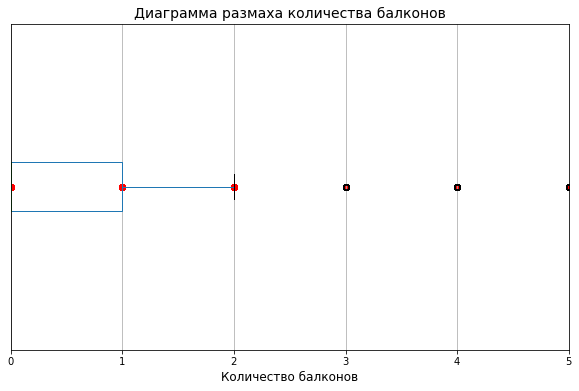

In [69]:
#Построим диаграмму размаха
data.boxplot(column='balcony', figsize=(10, 6), vert=False)
plt.xlim(0, 5)
plt.xlabel('Количество балконов', fontsize=12)  
plt.title('Диаграмма размаха количества балконов', fontsize=14)  
plt.scatter(x=data['balcony'], y=np.repeat(1, len(data['balcony'])), color='red', alpha=0.5)
plt.yticks([])  
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Видны выбросы выше 2 балконов.

Сделаем значения balcony = NAN, если в квартире больше 2 балконов, а total_area_category не равна 'больше 70м²'
</div>

In [70]:
data.query('balcony > 2 and total_area_category !=  "больше 70м²"')['balcony'].shape[0]

248

In [71]:
data.loc[(data['balcony'] > 2) & (data['total_area_category'] != 'больше 70м²'), 'balcony'] = np.nan

<b>Обработка аномалий и выбросов total_images</b>

In [72]:
#Посмотрим статистику по числу фотографий квартиры в объявлении
data['total_images'].describe()

count    23381.000000
mean         9.889226
std          5.682764
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

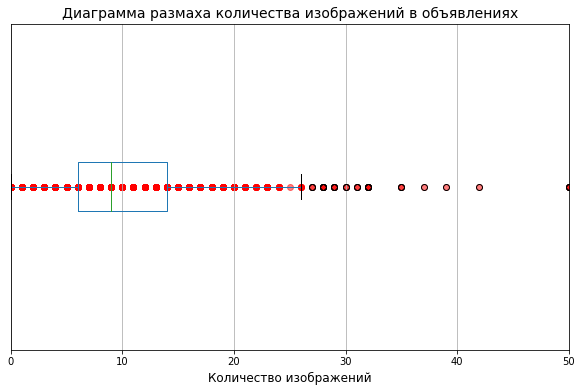

In [73]:
#Построим диаграмму размаха
data.boxplot(column='total_images', figsize=(10, 6),  vert=False)
plt.xlim(0, 50)
plt.xlabel('Количество изображений', fontsize=12)
plt.title('Диаграмма размаха количества изображений в объявлениях', fontsize=14)
plt.scatter(y=np.repeat(1, len(data['total_images'])), x=data['total_images'], color='red', alpha=0.5)
plt.yticks([])
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Видны выбросы выше 28 фотографий.

Если таких строк мало, то удалим их
</div>

In [74]:
percentage_dropped = (data.query('total_images > 28').shape[0] / data.shape[0]) * 100
print(f"Будет выброшено {data.query('total_images > 28').shape[0]} строк данных, что составляет {percentage_dropped:.2f}%")

Будет выброшено 19 строк данных, что составляет 0.08%


In [75]:
#Удалим все эти строки
data = data.query('total_images <= 28')

<b>Обработка аномалий и выбросов kitchen_area</b>

In [76]:
#Посмотрим статистику по площади кухни
data['kitchen_area'].describe()

count    23362.000000
mean        10.434328
std          5.574559
min          1.300000
25%          7.300000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

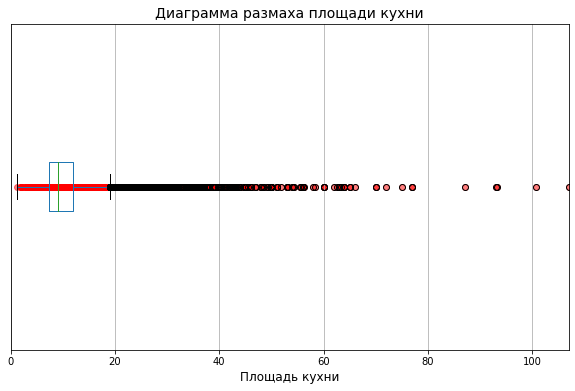

In [77]:
#Построим диаграмму размаха
data.boxplot(column='kitchen_area', figsize=(10, 6), vert=False)
plt.xlim(0, 107)
plt.xlabel('Площадь кухни', fontsize=12)
plt.title('Диаграмма размаха площади кухни', fontsize=14)
plt.scatter(y=np.repeat(1, len(data['kitchen_area'])), x=data['kitchen_area'], color='red', alpha=0.5)
plt.yticks([])
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

Видны выбросы выше 50 м² и ниже 3м².

Также, квартиры, в которых площадь кухни больше 50% от общей площади квартиры, выглядят как выбросы

Если таких строк мало, то удалим их
</div>

In [78]:
#Посчитаем квартиры, в которых площадь кухни больше 50% от общейплощади квартиры

percentage_dropped = (data[(data['kitchen_area'] / data['total_area']) > 0.5].shape[0] / data.shape[0]) * 100
print(f"Будет выброшено {data[(data['kitchen_area'] / data['total_area']) > 0.5].shape[0]} строк данных, что составляет {percentage_dropped:.2f}%")

Будет выброшено 69 строк данных, что составляет 0.30%


In [79]:
#Удалим эти строки
data = data[(data['kitchen_area'] / data['total_area']) < 0.5]

In [80]:
#Посчитаем, сколько объявлений содержат площадь кухни более 50
percentage_dropped = (data.query('kitchen_area >= 50 ').shape[0] / data.shape[0]) * 100
print(f"Будет выброшено {data.query('kitchen_area >= 50 ').shape[0]} строк данных, что составляет {percentage_dropped:.2f}%")

Будет выброшено 47 строк данных, что составляет 0.20%


In [81]:
#Посчитаем, сколько объявлений содержат площадь кухни менее 3

percentage_dropped = (data.query('kitchen_area <= 3 ').shape[0] / data.shape[0]) * 100
print(f"Будет выброшено {data.query('kitchen_area <= 3 ').shape[0]} строк данных, что составляет {percentage_dropped:.2f}%")

Будет выброшено 18 строк данных, что составляет 0.08%


In [82]:
#Удалим все эти строки
data = data[(data['kitchen_area'] > 3) & (data['kitchen_area'] < 50)]

<b>Обновим все индексы в обработанных данных</b>

In [83]:
data = data.reset_index(drop=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,tot/liv,total_area_category
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2.117647,больше 70м²
1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.60,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2.172043,от 40м² до 50м²
2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,1.632653,от 50м² до 70м²
3,0,64900000.0,159.00,2015-07-24,3,2.700,14,85.95,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,больше 70м²
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3.125000,больше 70м²
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23218,9,4600000.0,62.40,2016-08-05,3,2.600,9,40.00,8,False,...,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0,1.560000,от 50м² до 70м²
23219,9,9700000.0,133.81,2017-03-21,3,3.700,5,73.30,3,False,...,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,1.825512,больше 70м²
23220,14,3100000.0,59.00,2018-01-15,3,2.500,5,38.00,4,False,...,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,1.552632,от 50м² до 70м²
23221,13,11475000.0,76.75,2017-03-28,2,3.000,17,41.49,12,False,...,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,NaN,больше 70м²


#### <span style="font-size: 1.3em;">Общие выводы по предобработке данных</span>


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
1. <b>Пропуски</b>

    - <b>balcony</b>: замена нулем
    - <b>is_apartment</b>: замена на "False".
    - <b>ceiling_height</b>: замена на медиану по населенному пункту. 
    - <b>airports_nearest</b>, <b>parks_around3000</b>, <b>parks_nearest</b>, <b>ponds_around3000</b>, <b>ponds_nearest</b>, <b>days_exposition</b>: оставляем.
    - <b>locality_name</b>,  <b>floors_total</b>: удалили все
    - <b>cityCenters_nearest</b>: замена на медианные значения для каждого нас. пункта
    - <b>living_area</b>: замена отношением total_area и вычисленного коэф.
    - <b>kitchen_area</b>:замена на медиану по категориям общей площади.
    
    
2. <b>Изменение типов данных</b>

    * <b>first_day_exposition</b> с object на daytime
    * <b>floors_total</b> с float на int
    * <b>balcony с float</b> на int
    * <b>parks_around3000</b> с float на int
    * <b>ponds_around3000</b> с float на int
    
    
3. <b>Изучение уникальных значений в locality_name</b>

    - Поменяли все буквы "ё" на "е" и убрали все приставки населенных пунктов
    
    
4. <b>Обработка аномалий и выбросов</b>
    - <b>ceiling_height</b>. Значения в диапазоне 25-35 поделили на 10. Выбросы:  до 2м, в диапазоне 6м-25м и 100м. Выброшено 28 строк данных, что составляет 0.12%
    - <b>rooms</b>. Выбросы: больше 7. Выброшено 31 строк данных, что составляет 0.13%
    - <b>airports_nearest</b>. Выброс в значении 0
    - <b>living_area</b>. Выбросы: менее 3м
    - <b>living_area</b>.Сделали значения balcony = NAN, если в квартире больше 2 балконов, а total_area_category не равна 'больше 70м²'
    - <b>total_images</b>. Выбросы: выше 28 фотографий. Ввыброшено 19 строк данных, что составляет 0.08%
    - <b>kitchen_area</b>. Выбросы: выше 50 м² и ниже 3м², площадь кухни больше 50% от общей площади квартиры.
</div>

###  <span style="font-size: 1.5em;">Посчитайте и добавьте в таблицу новые столбцы</span>

<b>Добавление столбцов</b>

In [84]:
#Добавление столбца 'price_per_sqm' - цена одного квадратного метра;
data['price_per_sqm'] =  (data['last_price'] / data['total_area']).round(0)

In [85]:
#Добавление столбца 'publication_day' - день недели публикации объявления;
data['publication_day'] = data['first_day_exposition'].dt.weekday

In [86]:
#Добавление столбца 'publication_month' - месяц публикации объявления;
data['publication_month'] = data['first_day_exposition'].dt.month

In [87]:
#Добавление столбца 'publication_year' - год публикации объявления;
data['publication_year'] = data['first_day_exposition'].dt.year

In [88]:
#Создание функции, которая будет определять тип этажа
def floor_typing(floor):
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    elif floor['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

In [89]:
#Добавление столбца 'floor_type' - тип этажа квартиры (значения — «первый», «последний», «другой»);
data['floor_type'] = data.apply(floor_typing ,axis=1)
data[['floor_type', 'floor', 'floors_total']].head(20)

,floor_type,floor,floors_total
0,другой,8,16
1,первый,1,11
2,другой,4,5
3,другой,9,14
4,другой,13,14
5,другой,5,12
6,другой,6,26
7,другой,22,24
8,другой,26,27
9,другой,7,9


In [90]:
#Добавление столбца 'distance_to_city_center_km' - расстояние до центра города в километрах;
data['floor_type'] = data.apply(floor_typing ,axis=1)
data['distance_to_city_center_km'] = (data['cityCenters_nearest'] / 1000).round(0).astype('Int64')

#### <span style="font-size: 1.3em;">Выводы</span>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
<b>Добавлены столбцы</b>
- <b>'price_per_sqm'</b> - цена одного квадратного метра;
- <b>'publication_day'</b> - день недели публикации объявления;
- <b>'publication_month'</b> - месяц публикации объявления;
- <b>'publication_year'</b> - год публикации объявления;
- <b>'floor_type'</b> - тип этажа квартиры (значения — «первый», «последний», «другой»);
- <b>'distance_to_city_center_km'</b> - расстояние до центра города в километрах.
 
</div>    

###  <span style="font-size: 1.5em;">Проведите исследовательский анализ данных</span>

#### <span style="font-size: 1.3em;">Изучим отдельно каждый интересущий нас параметр</span>

<b>Общая площадь</b>

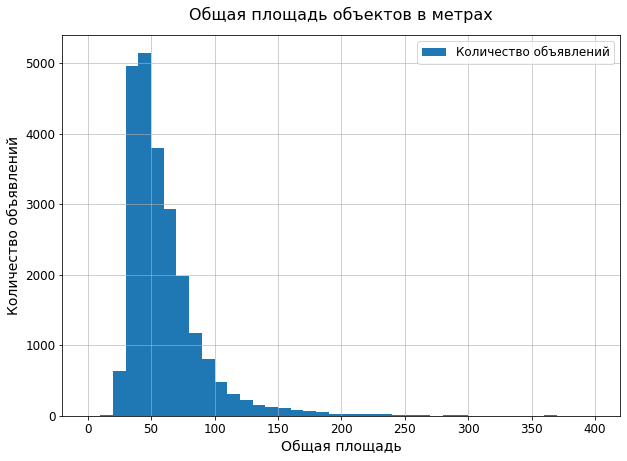

In [91]:
#Посмотрим на распределение
data['total_area'].hist(bins=40, range=(0, 400), figsize=(10,7))

plt.title('Общая площадь объектов в метрах', fontsize=16, pad=15)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

- Распределение напоминает Пуассоновское.
- Большинство квартир имеют площадь до 80.
- Виден хвост от 80 и далее
</div>

<b>Жилая площадь</b>

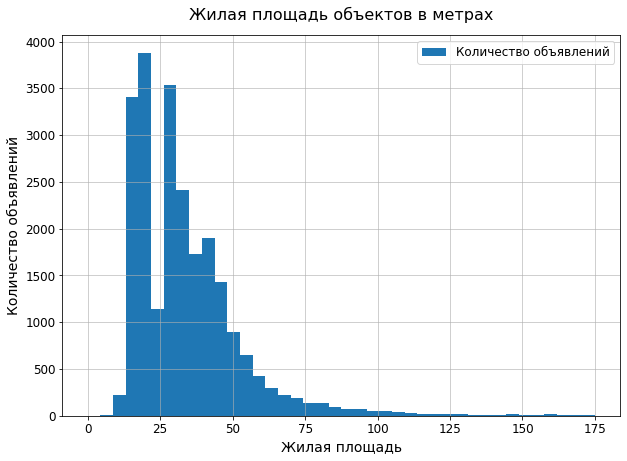

In [92]:
#Посмотрим на распределение
data['living_area'].hist(bins=40, range=(0, 175), figsize=(10,7))

plt.title('Жилая площадь объектов в метрах', fontsize=16, pad=15)
plt.xlabel('Жилая площадь', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

- Виден странный пробел в районе 25 м
- Большинство квартир имеют до 50 м жилой площади
- Распределение также напоминает Пуассоновское
</div>

<b>Площадь кухни</b>

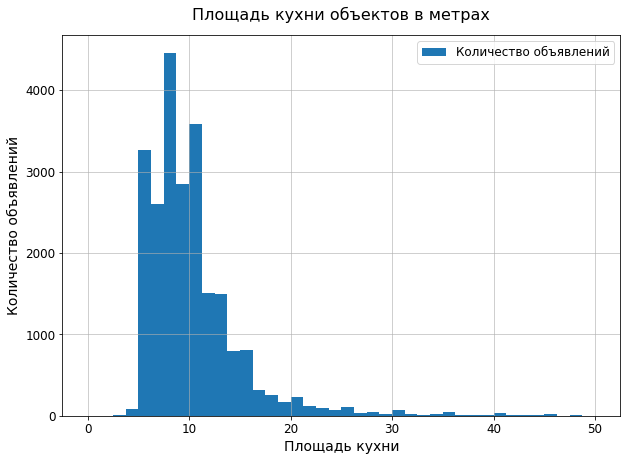

In [93]:
#Посмотрим на распределение
data['kitchen_area'].hist(bins=40, range=(0, 50), figsize=(10,7))

plt.title('Площадь кухни объектов в метрах', fontsize=16, pad=15)
plt.xlabel('Площадь кухни', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Большинство квартир имеют кухню до 17 м
- Медиана находится в значении 9
- Распределение напоминает Пуассоновское, с хвостом до 50 м
</div>

<b>Цена объекта</b>

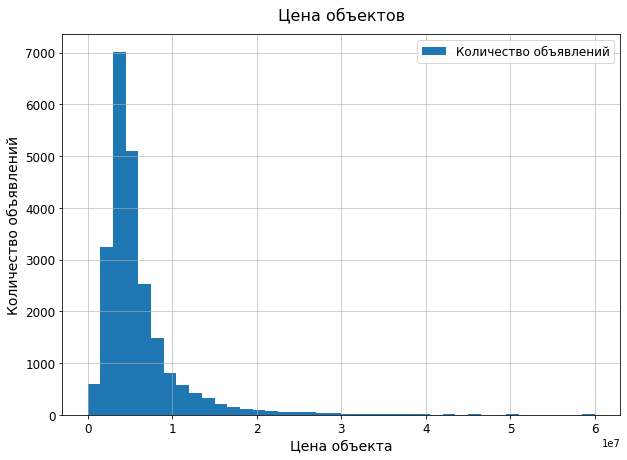

In [94]:
#Посмотрим на распределение
data['last_price'].hist(bins=40, range=(0, 60000000), figsize=(10,7))

plt.title('Цена объектов', fontsize=16, pad=15)
plt.xlabel('Цена объекта', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Наиболее частые объявления содержат цену до 10 мл
- Есть хвост более дорогих квартир: до 60 мл
- Распределение похоже на нормальное
</div>

<b>Количество комнат</b>

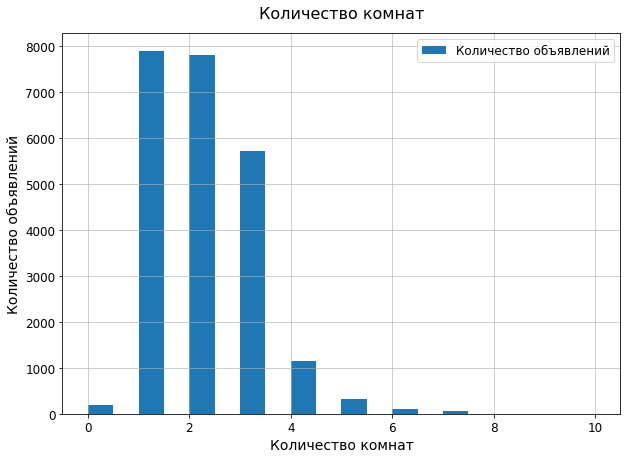

In [95]:
#Посмотрим на распределение
data['rooms'].hist(bins=20, range=(0, 10), figsize=(10,7))

plt.title('Количество комнат', fontsize=16, pad=15)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Наиболее часто встречаются квартиры, имеющие до 4 комнат
- Имеется хвост квартир, с более 4 комнатами
- Распределение похоже на Пуассоновское
</div>

<b>Высота потолков</b>

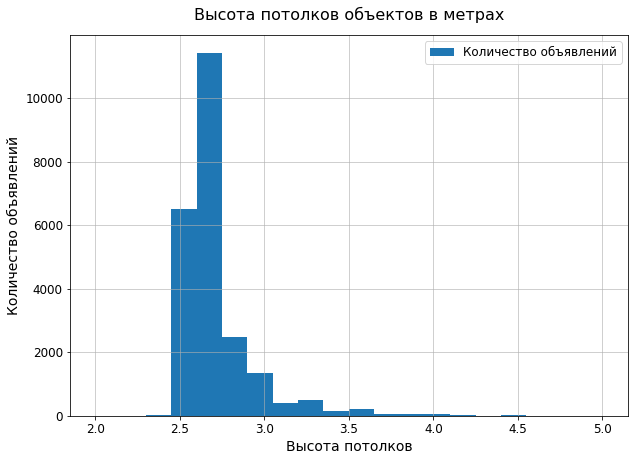

In [96]:
#Посмотрим на распределение
data['ceiling_height'].hist(bins=20, range=(2, 5), figsize=(10,7))

plt.title('Высота потолков объектов в метрах', fontsize=16, pad=15)
plt.xlabel('Высота потолков', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Наиболее часто встречаются квартиры, имеющие высоту потолков от 2.5 до 3 метров
- Имеется хвост квартир, с более высокими потолками
- Распределение похоже на Пуассоновское
</div>

<b>Этаж квартиры</b>

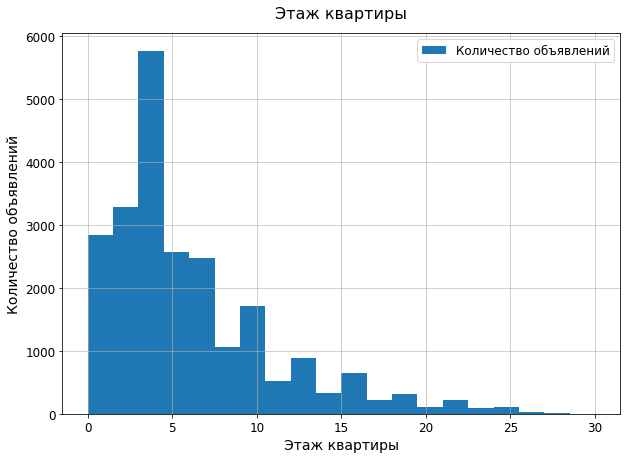

In [97]:
#Посмотрим на распределение
data['floor'].hist(bins=20, range=(0, 30), figsize=(10,7))

plt.title('Этаж квартиры', fontsize=16, pad=15)
plt.xlabel('Этаж квартиры', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Наиболее часто встречаются квартиры, находящиеся до 10 этажа
- Имеется хвотс квартир на более высоких этажах
- Распределение похоже на Пуассоновское
</div>

<b>Тип этажа квартиры</b>

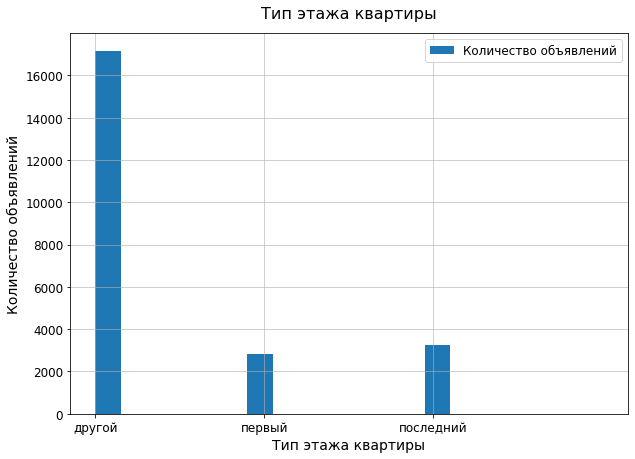

In [98]:
#Посмотрим на распределение
data['floor_type'].hist(bins=20, range=(0, 3), figsize=(10,7))

plt.title('Тип этажа квартиры', fontsize=16, pad=15)
plt.xlabel('Тип этажа квартиры', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
Было бы информативнее взглянуть на круговую диаграмму
</div>

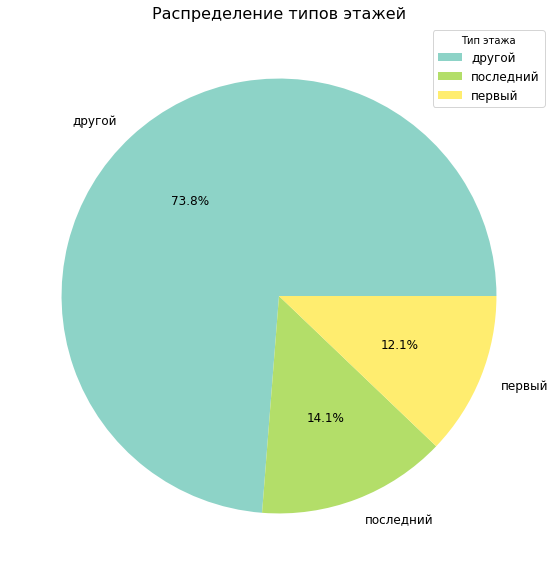

In [99]:
#Получение данных для диаграммы
floor_type_counts = data['floor_type'].value_counts()

#Генерация цветовой палитры
num_floor_types = len(floor_type_counts)
color_map_floor_types = plt.cm.get_cmap('Set3', num_floor_types)
bar_colors_floor_types = [color_map_floor_types(i) for i in np.linspace(0, 1, num_floor_types)]

#Создание круговой диаграммы
plt.figure(figsize=(14, 10))
plt.pie(floor_type_counts, labels=floor_type_counts.index, autopct='%.1f%%', colors=bar_colors_floor_types, textprops={'fontsize': 12})
plt.title('Распределение типов этажей', fontsize=16)
plt.legend(floor_type_counts.index, title='Тип этажа', loc='best', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- В основном в объявлениях квартиры находятся ни на первом, ни на последнем этажах (73.8%%)
- Кол-во квартир на первом и на последнем этаже примерно одинаково(12.1% и 14.1% соответственно)
</div>

<b>Общее количество этажей в доме</b>

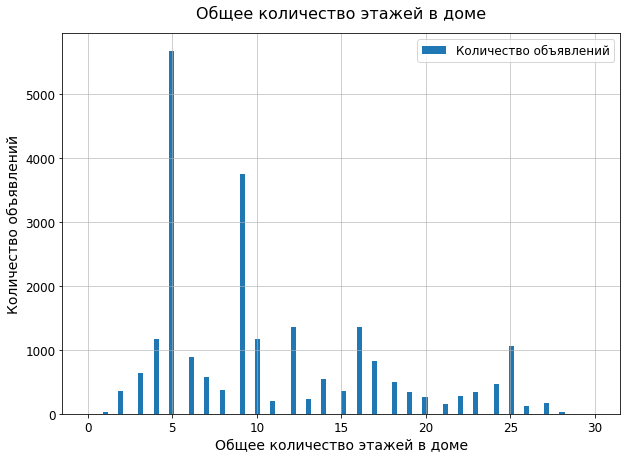

In [100]:
#Посмотрим на распределение
data['floors_total'].hist(bins=100, range=(0, 30), figsize=(10,7))

plt.title('Общее количество этажей в доме', fontsize=16, pad=15)
plt.xlabel('Общее количество этажей в доме', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Видны пиковые значения кол-ва квартир в 5 и 9 этажных зданиях
- Также часто в объявлениях попадаются 12, 16 и 25 этажные здания
</div>

<b>Расстояние до центра города в метрах</b>

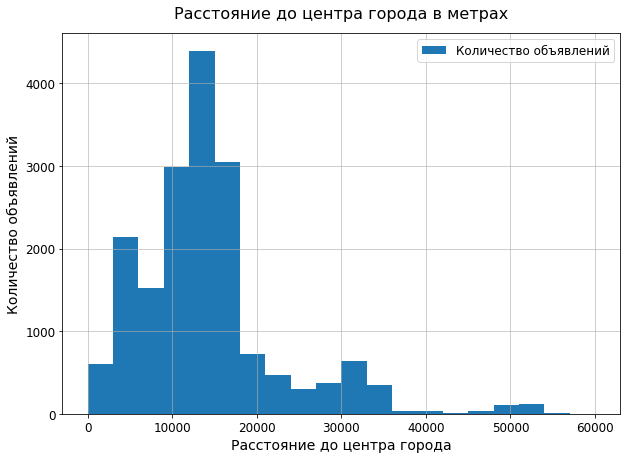

In [101]:
#Посмотрим на распределение
data['cityCenters_nearest'].hist(bins=20, range=(0, 60000), figsize=(10,7))

plt.title('Расстояние до центра города в метрах', fontsize=16, pad=15)
plt.xlabel('Расстояние до центра города', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Наиболее часто встречаются квартиры на расстоянии до 20000 м от центра
- Распределение напоминает нормальное
- Также имеется хвост больших значений. Это может быть связано с ошибками при составлении автоматически полученных данных.
</div>

<b>Расстояние до ближайшего аэропорта</b>

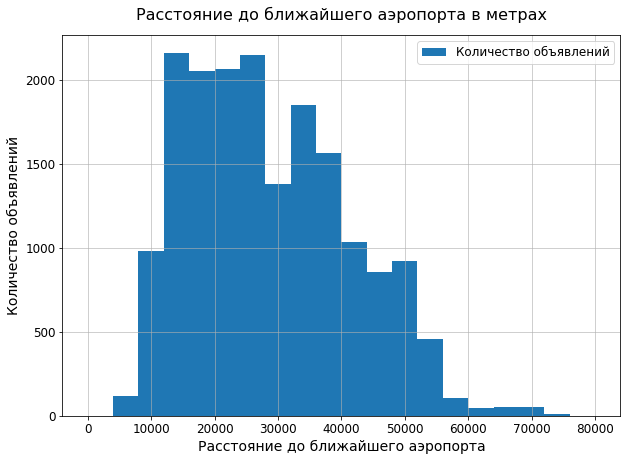

In [102]:
#Посмотрим на распределение
data['airports_nearest'].hist(bins=20, range=(0, 80000), figsize=(10,7))

plt.title('Расстояние до ближайшего аэропорта в метрах', fontsize=16, pad=15)
plt.xlabel('Расстояние до ближайшего аэропорта', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Наиболее часто встречаются квартиры на расстоянии до 50000 м от аэропорта
- Распределение напоминает нормальное
</div>

<b>Расстояние до ближайшего парка</b>

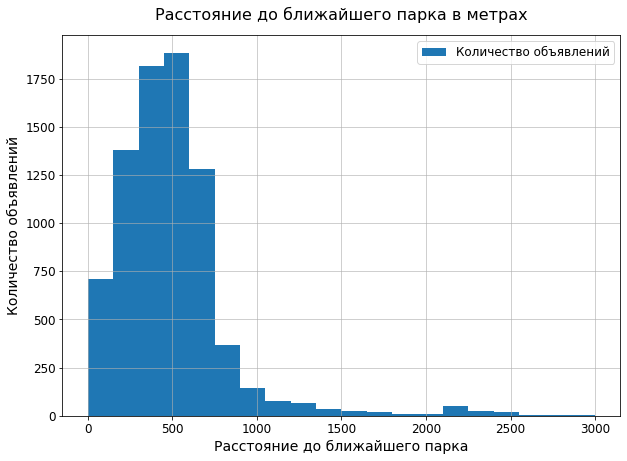

In [103]:
#Посмотрим на распределение
data['parks_nearest'].hist(bins=20, range=(0, 3000), figsize=(10,7))

plt.title('Расстояние до ближайшего парка в метрах', fontsize=16, pad=15)
plt.xlabel('Расстояние до ближайшего парка', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Количество объявлений'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Распределение очень похоже на нормальное
- В основном квартиры находятся на расстоянии до 1 км от парка 
</div>

<b>День и месяц публикации объявления</b>

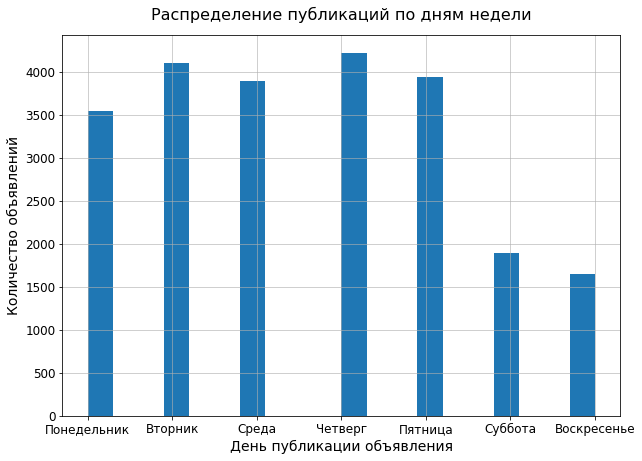

In [104]:
#Посмотрим на распределение по дням
data['publication_day'].hist(bins=20, range=(0, 6), figsize=(10,7))

plt.title('Распределение публикаций по дням недели', fontsize=16, pad=15)
plt.xlabel('День публикации объявления', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.75)
plt.xticks(range(0, 7), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

plt.show()

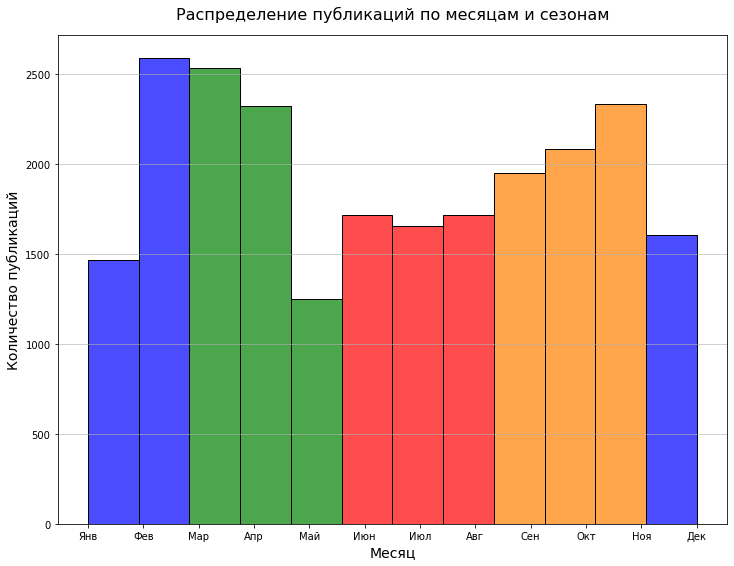

In [105]:
plt.figure(figsize=(12, 9))

#Создаем гистограмму для каждого месяца с указанием цвета
sns.histplot(data=data, x='publication_month', bins=12, kde=False)
plt.title('Распределение публикаций по месяцам и сезонам', fontsize=16, pad=15)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество публикаций', fontsize=14)
plt.gca().patches[0].set_facecolor((0, 0, 1, 0.7))   # Январь
plt.gca().patches[1].set_facecolor((0, 0, 1, 0.7))   # Февраль
plt.gca().patches[2].set_facecolor((0, 0.5, 0, 0.7)) # Март
plt.gca().patches[3].set_facecolor((0, 0.5, 0, 0.7)) # Апрель
plt.gca().patches[4].set_facecolor((0, 0.5, 0, 0.7)) # Май
plt.gca().patches[5].set_facecolor((1, 0, 0, 0.7))   # Июнь
plt.gca().patches[6].set_facecolor((1, 0, 0, 0.7))   # Июль
plt.gca().patches[7].set_facecolor((1, 0, 0, 0.7))   # Август
plt.gca().patches[8].set_facecolor((1, 0.5, 0, 0.7)) # Сентябрь
plt.gca().patches[9].set_facecolor((1, 0.5, 0, 0.7)) # Октябрь
plt.gca().patches[10].set_facecolor((1, 0.5, 0, 0.7)) # Ноябрь
plt.gca().patches[11].set_facecolor((0, 0, 1, 0.7))   # Декабрь

plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(axis='y', alpha=0.75)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Обычно объявления публикуются в буднии дни
- Динамика появления новых объявлений оставалась одинаковой летом
- Видна отрицательная динамика появления новых объявлений весной
- Видна положительная динамика появления новых объявлений осенью
</div>

#### <span style="font-size: 1.3em;">Изучим, как быстро продавались квартиры</span>

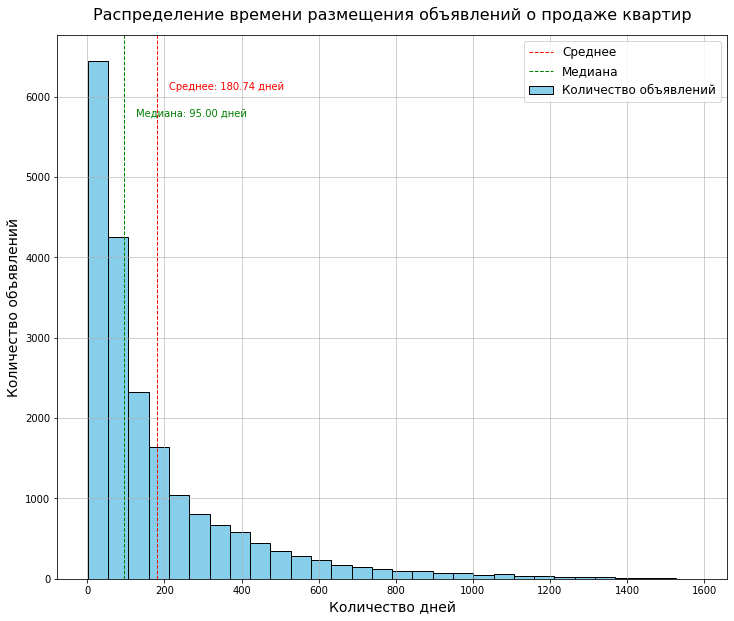

In [106]:
#Настройки графика
plt.figure(figsize=(12, 10))
plt.title("Распределение времени размещения объявлений о продаже квартир", fontsize=16, pad=15)
plt.xlabel("Количество дней", fontsize=14)
plt.ylabel("Количество объявлений", fontsize=14)
#Построение гистограммы
data['days_exposition'].plot(kind='hist', bins=30, edgecolor='black', color='skyblue', label='Количество объявлений')
#Добавление вертикальных линий для среднего и медианы
mean_days = data['days_exposition'].mean()
median_days = data['days_exposition'].median()
plt.axvline(mean_days, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median_days, color='green', linestyle='dashed', linewidth=1, label='Медиана')
#Добавление числовых значений среднего и медианы с правильным размещением
plt.text(mean_days + 30, plt.ylim()[1] * 0.9, f"Среднее: {mean_days:.2f} дней", color='red')
plt.text(median_days + 30, plt.ylim()[1] * 0.85, f"Медиана: {median_days:.2f} дней", color='green')
#Установка названия оси Y вручную(Без этого ставил почему-то на frequency)
plt.gca().set_ylabel("Количество объявлений")
plt.grid(alpha=0.75)
#Добавление легенды
plt.legend(fontsize=12)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Медиана - 95 дней, среднее - 180 дней
- Быстрыми можно считать продажи за 3 или менее месяца
- Квартиры, проданные за более чем полгода, можно отнести к долго продающимся
- Обычно квартиры продаются за 3 месяца
</div>

#### <span style="font-size: 1.3em;">Какие факторы больше всего влияют на общую (полную) стоимость объекта?</span>

<b>Общая стоимость / общая площадь</b>

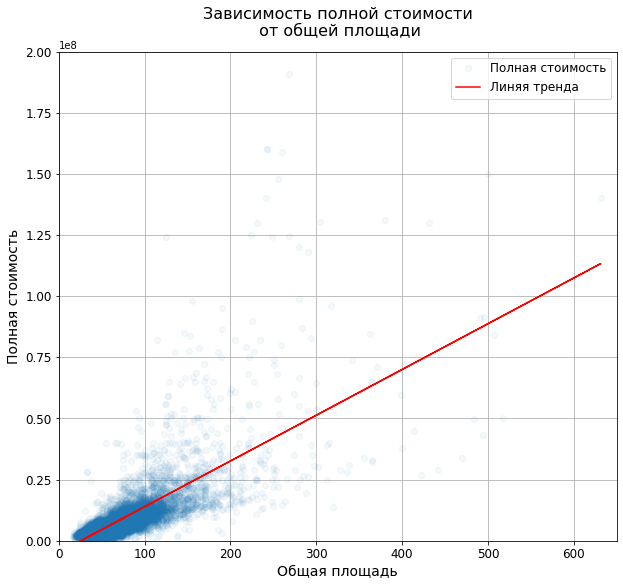

In [107]:
x = data['total_area']
y = data['last_price']
#Рассчет для квадратичной линии тренда
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)

# Построение графика
plt.figure(figsize=(10, 9))
plt.plot(x, y, 'o', label='Полная стоимость', alpha=0.05)
plt.plot (x, p(x), color="red",  label='Линяя тренда') 
plt.xlim(0, 650)
plt.ylim(0, 200000000)
plt.title('Зависимость полной стоимости\n от общей площади', fontsize=16, pad=15)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [108]:
print('Коэффициент корреляции Пирсона между общей стоимостью и общей площадью :', data['last_price'].corr(data['total_area']).round(2))

Коэффициент корреляции Пирсона между общей стоимостью и общей площадью : 0.62


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
<b>Вывод</b>
- Видна положительная корреляция между общей стоимостью и общей площадью : 0.62
</div>

<b>Общая стоимость / жилая площадь</b>

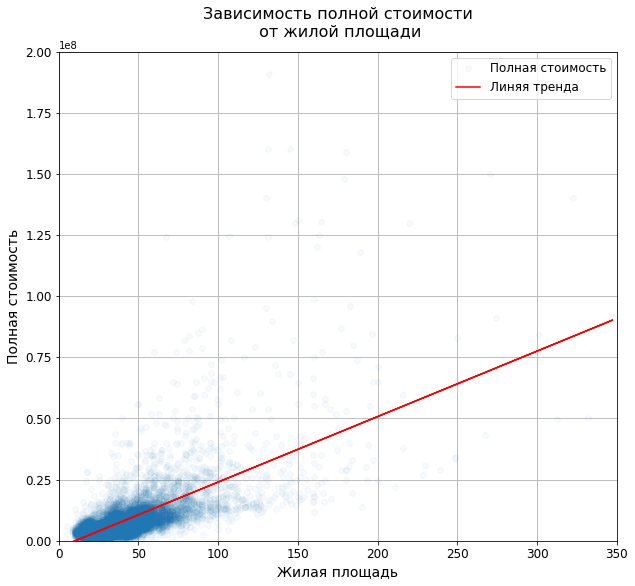

In [109]:
x = data['living_area']
y = data['last_price']
#Рассчет для квадратичной линии тренда
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)

# Построение графика
plt.figure(figsize=(10, 9))
plt.plot(x, y, 'o', label='Полная стоимость', alpha=0.03)
plt.plot (x, p(x), color="red",  label='Линяя тренда') 
plt.xlim(0, 350)
plt.ylim(0, 200000000)
plt.title('Зависимость полной стоимости\n от жилой площади', fontsize=16, pad=15)
plt.xlabel('Жилая площадь', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [110]:
print('Коэффициент корреляции Пирсона между общей стоимостью и жилой площадью :', data['last_price'].corr(data['living_area']).round(2))

Коэффициент корреляции Пирсона между общей стоимостью и жилой площадью : 0.56


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Видна положительная корреляция между общей стоимостью и жилой площадью : 0.56
</div>

<b>Общая стоимость / площадь кухни</b>

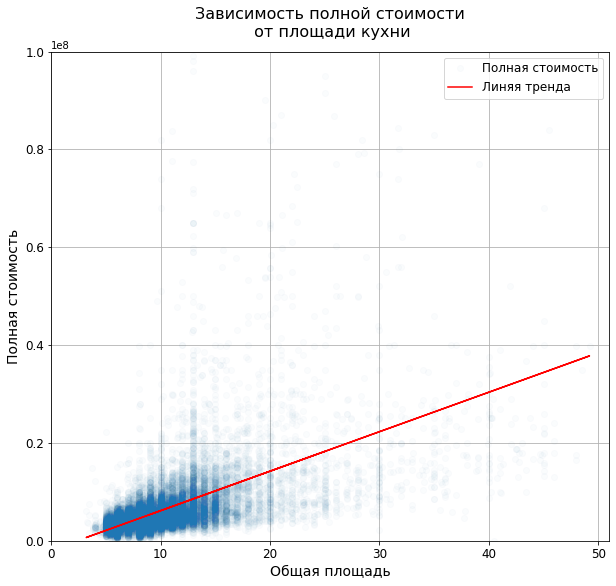

In [111]:
x = data['kitchen_area']
y = data['last_price']
#Рассчет для квадратичной линии тренда
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)

# Построение графика
plt.figure(figsize=(10, 9))
plt.plot(x, y, 'o', label='Полная стоимость', alpha=0.02)
plt.plot (x, p(x), color="red",  label='Линяя тренда')
plt.xlim(0, 51)
plt.ylim(0, 100000000)
plt.title('Зависимость полной стоимости\n от площади кухни', fontsize=16, pad=15)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [112]:
print('Коэффициент корреляции Пирсона между общей стоимостью и площадью кухни :', data['last_price'].corr(data['kitchen_area']).round(2))

Коэффициент корреляции Пирсона между общей стоимостью и площадью кухни : 0.4


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Видна положительная корреляция между общей стоимостью и площадью кухни : 0.4
</div>

<b>Общая стоимость / число комнат</b>

<Figure size 720x648 with 0 Axes>

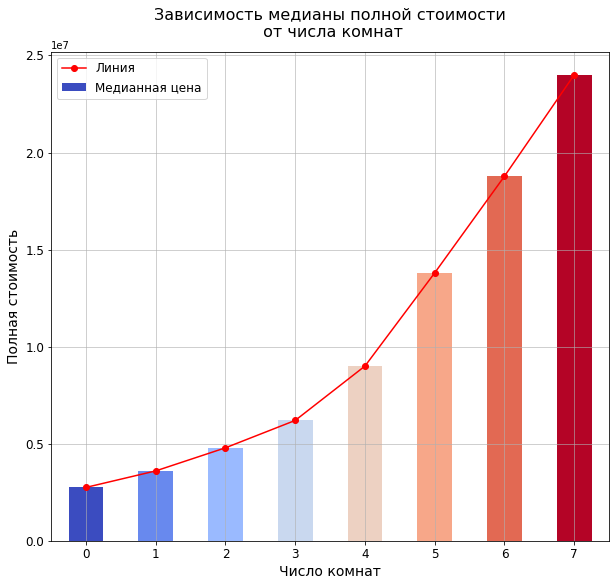

In [113]:
pivot_table_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['count','median'])
x_line = np.arange(len(pivot_table_rooms))
y_line = pivot_table_rooms[('median', 'last_price')]

#Генерация градиента цветов для столбиков
num_bars_rooms = len(pivot_table_rooms)
color_map_rooms = plt.cm.get_cmap('coolwarm', num_bars_rooms)  
#Создание списка цветов на основе градиента
bar_colors_publication_year = [color_map_rooms(i) for i in np.linspace(0, 1, num_bars_rooms)]

plt.figure(figsize=(10, 9))
pivot_table_rooms.plot(y=('median', 'last_price'), kind='bar', figsize=(10, 9), label='Медианная цена', color=bar_colors_publication_year)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость медианы полной стоимости\n от числа комнат', fontsize=16, pad=15)
plt.xlabel('Число комнат', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(x_line, pivot_table_rooms.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

In [114]:
print('Коэффициент корреляции Пирсона между общей стоимостью и числом комнат :', data['last_price'].corr(data['rooms']).round(2))

Коэффициент корреляции Пирсона между общей стоимостью и числом комнат : 0.35


<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

- Видна положительная корреляция между общей стоимостью и числом комнат : 0.35
</div>

<b>Общая стоимость / тип этажа квартиры</b>

<Figure size 720x648 with 0 Axes>

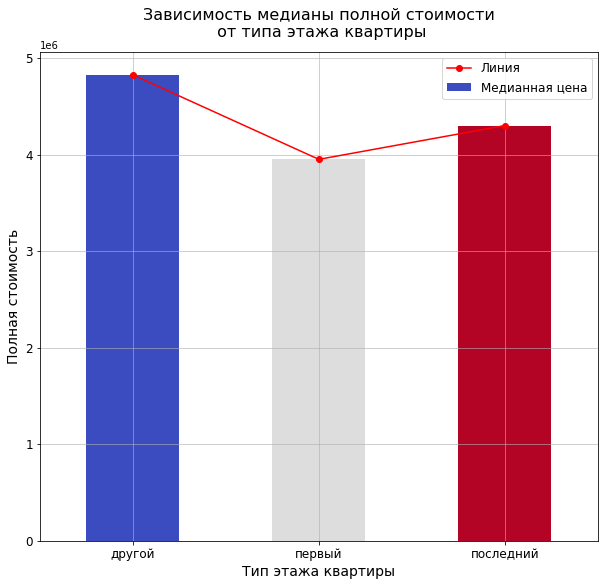

In [115]:
pivot_table_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc=['count','median'])
x_line = np.arange(len(pivot_table_floor_type))
y_line = pivot_table_floor_type[('median', 'last_price')]

#Генерация градиента цветов для столбиков
num_bars_floor_type = len(pivot_table_floor_type)
color_map_floor_type = plt.cm.get_cmap('coolwarm', num_bars_floor_type)  
#Создание списка цветов на основе градиента
bar_colors_floor_type = [color_map_floor_type(i) for i in np.linspace(0, 1, num_bars_floor_type)]

plt.figure(figsize=(10, 9))
pivot_table_floor_type.plot(y=('median', 'last_price'), kind='bar', figsize=(10, 9), label='Медианная цена', color=bar_colors_floor_type)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость медианы полной стоимости\n от типа этажа квартиры', fontsize=16, pad=15)
plt.xlabel('Тип этажа квартиры', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(x_line, pivot_table_floor_type.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

- Ярко выраженной зависимости не наблюдается. Видно, что первый и последний этаж обычно имеют более низкую цену.
</div>

<b>Общая стоимость / дата размещения</b>

<Figure size 720x648 with 0 Axes>

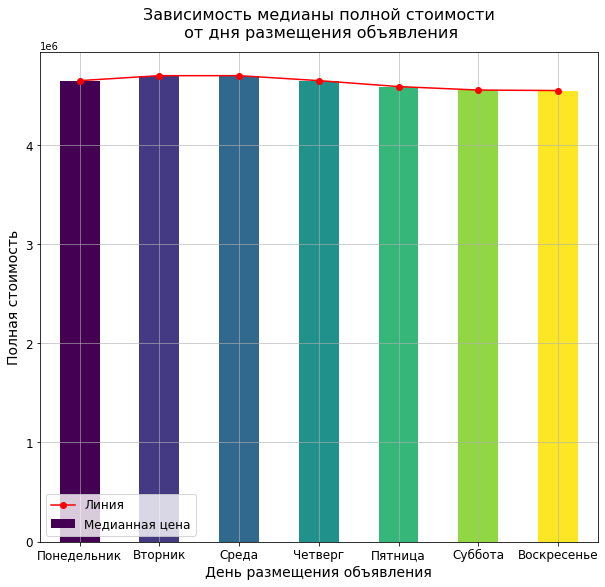

In [116]:
pivot_table_publication_day = data.pivot_table(index='publication_day', values='last_price', aggfunc=['count','median'])
x_line = np.arange(len(pivot_table_publication_day))
y_line = pivot_table_publication_day[('median', 'last_price')]
#Генерация градиента цветов для столбиков
num_bars_publication_day = len(pivot_table_publication_day)
color_map_publication_day = plt.cm.get_cmap('viridis', num_bars_publication_day)  
#Создание списка цветов на основе градиента
bar_colors_publication_day = [color_map_publication_day(i) for i in np.linspace(0, 1, num_bars_publication_day)]

plt.figure(figsize=(10, 9))
pivot_table_publication_day.plot(y=('median', 'last_price'), kind='bar', figsize=(10, 9), label='Медианная цена', color=bar_colors_publication_day)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость медианы полной стоимости\n от дня размещения объявления', fontsize=16, pad=15)
plt.xlabel('День размещения объявления', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(x_line, pivot_table_publication_day.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(range(0, 7), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Ярко выраженной зависимости не наблюдается.
</div>

<Figure size 1440x1080 with 0 Axes>

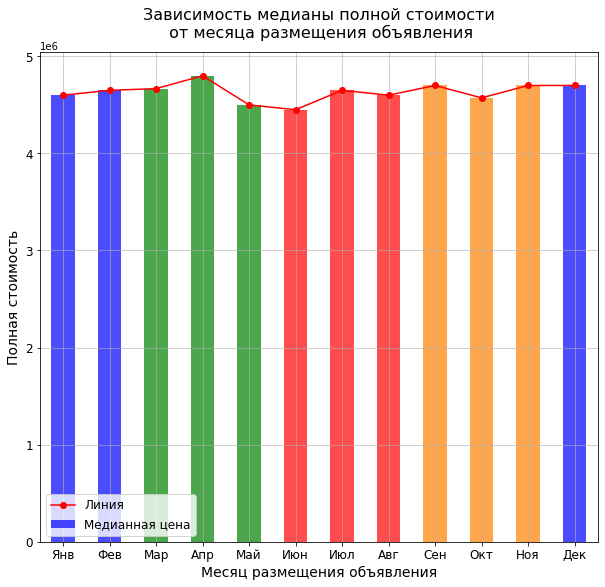

In [117]:
pivot_table_publication_month = data.pivot_table(index='publication_month', values='last_price', aggfunc=['count','median'])
x_line = np.arange(len(pivot_table_publication_month))
y_line = pivot_table_publication_month[('median', 'last_price')]

plt.figure(figsize=(20, 15))
pivot_table_publication_month.plot(y=('median', 'last_price'), kind='bar', figsize=(10, 9), label='Медианная цена')
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость медианы полной стоимости\n от месяца размещения объявления', fontsize=16, pad=15)
plt.xlabel('Месяц размещения объявления', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(x_line, pivot_table_publication_month.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().patches[0].set_facecolor((0, 0, 1, 0.7))   # Январь
plt.gca().patches[1].set_facecolor((0, 0, 1, 0.7))   # Февраль
plt.gca().patches[2].set_facecolor((0, 0.5, 0, 0.7)) # Март
plt.gca().patches[3].set_facecolor((0, 0.5, 0, 0.7)) # Апрель
plt.gca().patches[4].set_facecolor((0, 0.5, 0, 0.7)) # Май
plt.gca().patches[5].set_facecolor((1, 0, 0, 0.7))   # Июнь
plt.gca().patches[6].set_facecolor((1, 0, 0, 0.7))   # Июль
plt.gca().patches[7].set_facecolor((1, 0, 0, 0.7))   # Август
plt.gca().patches[8].set_facecolor((1, 0.5, 0, 0.7)) # Сентябрь
plt.gca().patches[9].set_facecolor((1, 0.5, 0, 0.7)) # Октябрь
plt.gca().patches[10].set_facecolor((1, 0.5, 0, 0.7)) # Ноябрь
plt.gca().patches[11].set_facecolor((0, 0, 1, 0.7))   # Декабрь
plt.xticks(range(0, 12), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>

- Ярко выраженной зависимости не наблюдается.
</div>

<Figure size 720x648 with 0 Axes>

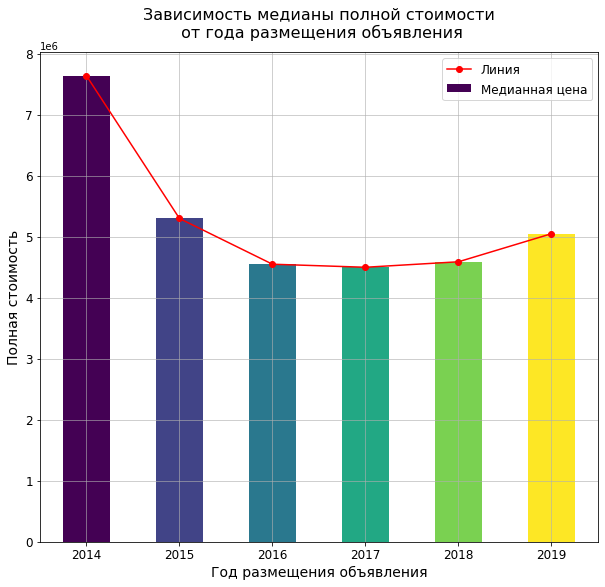

In [118]:
pivot_table_publication_year = data.pivot_table(index='publication_year', values='last_price', aggfunc=['count','median'])
x_line = np.arange(len(pivot_table_publication_year))
y_line = pivot_table_publication_year[('median', 'last_price')]
#Генерация градиента цветов для столбиков
num_bars_publication_year = len(pivot_table_publication_year)
color_map_publication_year = plt.cm.get_cmap('viridis', num_bars_publication_year)  
#Создание списка цветов на основе градиента
bar_colors_publication_year = [color_map_publication_year(i) for i in np.linspace(0, 1, num_bars_publication_year)]

plt.figure(figsize=(10, 9))
pivot_table_publication_year.plot(y=('median', 'last_price'), kind='bar', figsize=(10, 9), label='Медианная цена', color=bar_colors_publication_year)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость медианы полной стоимости\n от года размещения объявления', fontsize=16, pad=15)
plt.xlabel('Год размещения объявления', fontsize=14)
plt.ylabel('Полная стоимость', fontsize=14)
plt.xticks(x_line, pivot_table_publication_year.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

<Figure size 720x648 with 0 Axes>

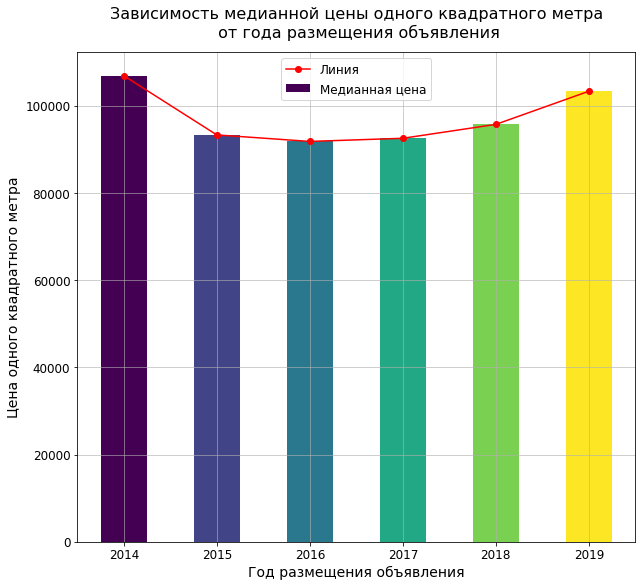

In [119]:
pivot_table_publication_year_price_per_m2 = data.pivot_table(index='publication_year', values='price_per_sqm', aggfunc=['count','median'])
x_line = np.arange(len(pivot_table_publication_year_price_per_m2))
y_line = pivot_table_publication_year_price_per_m2[('median', 'price_per_sqm')]
#Генерация градиента цветов для столбиков
num_bars_price_per_m2 = len(pivot_table_publication_year_price_per_m2)
color_map_price_per_m2 = plt.cm.get_cmap('viridis', num_bars_price_per_m2)  
#Создание списка цветов на основе градиента
bar_colors_price_per_m2 = [color_map_price_per_m2(i) for i in np.linspace(0, 1, num_bars_price_per_m2)]

plt.figure(figsize=(10, 9))
pivot_table_publication_year_price_per_m2.plot(y=('median', 'price_per_sqm'), kind='bar', figsize=(10, 9), label='Медианная цена', color=bar_colors_price_per_m2)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость медианной цены одного квадратного метра\n от года размещения объявления', fontsize=16, pad=15)
plt.xlabel('Год размещения объявления', fontsize=14)
plt.ylabel('Цена одного квадратного метра', fontsize=14)
plt.xticks(x_line, pivot_table_publication_year_price_per_m2.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Видна отрицательная динамика полной стоимости с 2014 по 2016 год. Повышение цен наблюдалось между 2018 и 2019 годами
- С 2014 по 2015 наблюдалось снижение цен за 1 кв метр. Цена оставалось приметро одинаковой до 2017 года, и только с 2018 по 2019 мы видим повышение цен.
</div>

#### <span style="font-size: 1.3em;">Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</span>

In [120]:
#Найдем 10 населенных пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index
filtered_data = data[data['locality_name'].isin(top_localities)]
#Посчитаем среднюю цену одного квадратного метра и выведем данные в виде сводной таблицы
pivot_table_top_localities = (filtered_data
    .pivot_table(
        index='locality_name',
        values='price_per_sqm',
        aggfunc='mean')
    .sort_values(by='price_per_sqm', ascending=False)
)
#Округлим значения и представим целочисленно
pivot_table_top_localities['price_per_sqm'] = pivot_table_top_localities['price_per_sqm'].round().astype(int)
pivot_table_top_localities

,price_per_sqm
locality_name,
Санкт-Петербург,114062
Пушкин,102884
Кудрово,95263
Парголово,90176
Мурино,85899
Шушары,78515
Колпино,75333
Гатчина,68753
Всеволожск,68679


<Figure size 720x648 with 0 Axes>

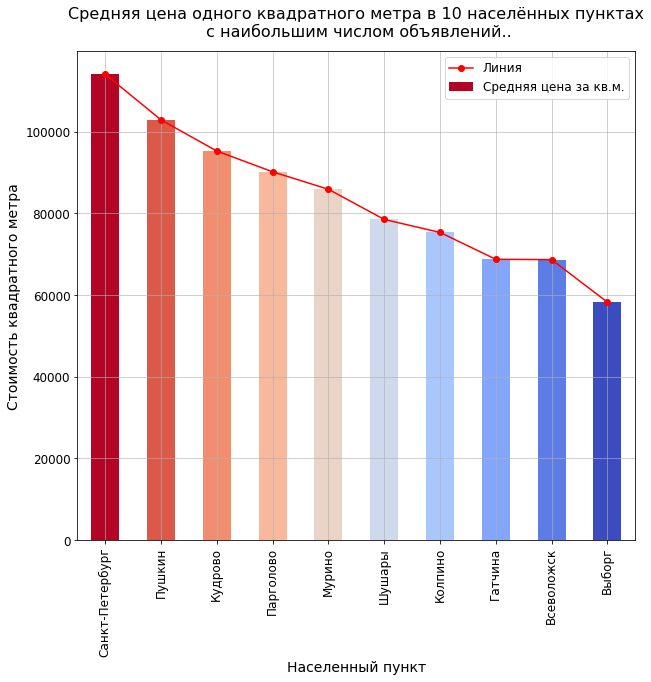

In [121]:
x_line = np.arange(len(pivot_table_top_localities))
y_line = pivot_table_top_localities['price_per_sqm']

#Генерация градиента цветов для столбиков
num_bars_top_localities = len(pivot_table_top_localities)
color_map_top_localities = plt.cm.get_cmap('coolwarm', num_bars_top_localities).reversed()  
#Создание списка цветов на основе градиента
bar_colors_top_localities = [color_map_top_localities(i) for i in np.linspace(0, 1, num_bars_top_localities)]

plt.figure(figsize=(10, 9))
pivot_table_top_localities.plot(y='price_per_sqm', kind='bar', figsize=(10, 9), label='Средняя цена за кв.м.', color=bar_colors_top_localities)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Средняя цена одного квадратного метра в 10 населённых пунктах\n с наибольшим числом объявлений..', fontsize=16, pad=15)
plt.xlabel('Населенный пункт', fontsize=14)
plt.ylabel('Стоимость квадратного метра', fontsize=14)
plt.xticks(x_line, pivot_table_top_localities.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

In [1]:
x_line = np.arange(len(pivot_table_top_localities))
y_line = pivot_table_top_localities['price_per_sqm']

#Генерация градиента цветов для столбиков
num_bars_top_localities = len(pivot_table_top_localities)
color_map_top_localities = plt.cm.get_cmap('coolwarm', num_bars_top_localities).reversed()  
#Создание списка цветов на основе градиента
bar_colors_top_localities = [color_map_top_localities(i) for i in np.linspace(0, 1, num_bars_top_localities)]

plt.figure(figsize=(10, 9))
pivot_table_top_localities.plot(y='price_per_sqm', kind='bar', figsize=(10, 9), label='Средняя цена за кв.м.', color=bar_colors_top_localities)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Средняя цена одного квадратного метра в 10 населённых пунктах\n с наибольшим числом объявлений..', fontsize=16, pad=15)
plt.xlabel('Населенный пункт', fontsize=14)
plt.ylabel('Стоимость квадратного метра', fontsize=14)
plt.xticks(x_line, pivot_table_top_localities.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

NameError: name 'np' is not defined

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- Как и ожидалось, Санкт-Петербург имеет наибольлую стоимость квадратного метра
- Рядом расположились населенные пункты Пушкин, Кудрово, Парголово
- Наименьшую цену за квадратный метр из выделенных населенных пунктов имеет Выборг
</div>

#### <span style="font-size: 1.3em;">Узнаем, как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге</span>

In [123]:
#Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. Данные представим в виде сводной таблицы
sp_pivot_table = (data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_to_city_center_km', values='price_per_sqm', aggfunc='mean')
)
#Округлим значения и представим целочисленно
sp_pivot_table['price_per_sqm'] = sp_pivot_table['price_per_sqm'].round().astype(int)
sp_pivot_table

,price_per_sqm
distance_to_city_center_km,
0,234269
1,174640
2,158547
3,120950
4,132332
5,138369
6,146539
7,153486
8,123537


<Figure size 720x648 with 0 Axes>

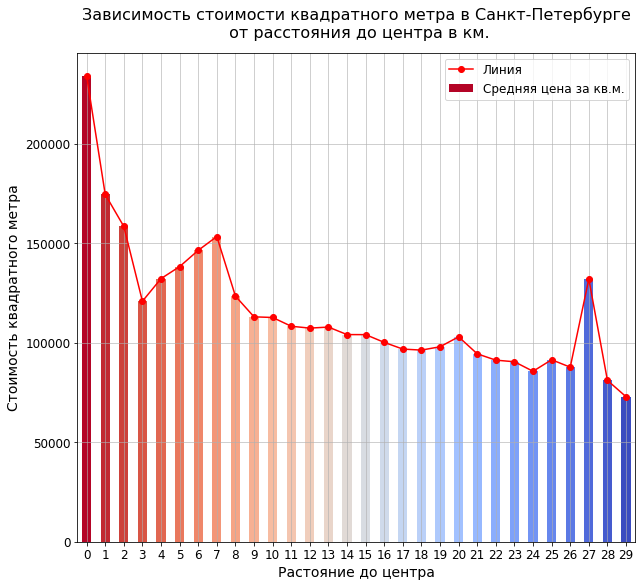

In [124]:
x_line = np.arange(len(sp_pivot_table))
y_line = sp_pivot_table['price_per_sqm']

#Генерация градиента цветов для столбиков
num_bars_sp = len(sp_pivot_table)
color_map_sp = plt.cm.get_cmap('coolwarm', num_bars_sp).reversed()  
#Создание списка цветов на основе градиента
bar_colors_sp = [color_map_sp(i) for i in np.linspace(0, 1, num_bars_sp)]

plt.figure(figsize=(10, 9))
sp_pivot_table.plot(y='price_per_sqm', kind='bar', figsize=(10, 9), label='Средняя цена за кв.м.', color=bar_colors_sp)
plt.plot(x_line, y_line, marker='o', linestyle='-', color='r', label='Линия')
plt.title('Зависимость стоимости квадратного метра в Санкт-Петербурге\n от расстояния до центра в км.', fontsize=16, pad=15)
plt.xlabel('Растояние до центра', fontsize=14)
plt.ylabel('Стоимость квадратного метра', fontsize=14)
plt.xticks(x_line, sp_pivot_table.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
<b>Вывод</b>
    
- В целом наблюдаем динамику уменьшения цены квадратного метра от растояния до центра
- Видим колокол в районе 3-9 км. На этом расстоянии находятся различные исторические и культурные достопримечательности, такие как Эрмитаж, Русский музей, Исаакиевский собор и другие. Возможно, из-за этого факта и видим повышение цен.
- Далее идет плавное понижение с пиком на 27 км. Похоже на примерное расположение дворца Петра I в Стрельне. Также здесь могут располагаться дачные поселки, коттеджные поселения и другие объекты отдыха, которые, в связи с очень хорошим расположением, могут стоить значительно дороже.
</div>

#### <span style="font-size: 1.3em;">Общий вывод по исследовательскому анализу данных</span>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
1. <span style="font-size: 1.1em;"><b>Отдельное изучение интересущих нас параметров объектов</b></span>
    
    - <b>Общая площадь</b>
        - Большинство квартир имеют площадь до 80.
    - <b>Жилая площадь</b>
        - Странный пробел в районе 25 м. Большинство квартир имеют до 50 м жилой площади
    - <b>Площадь кухни</b>
        - Большинство квартир имеют кухню до 17 м
        - Медиана находится в значении 9
    - <b>Цена объекта</b>
        - Наиболее частые объявления содержат цену до 10 мл
        - Есть хвост более дорогих квартир: до 60 мл
    - <b>Количество комнат</b>
        - Наиболее часто встречаются квартиры, имеющие до 4 комнат
        - Имеется хвост квартир, с более 4 комнатам
    - <b>Высота потолков</b>
        - Наиболее часто встречаются квартиры, имеющие высоту потолков от 2.5 до 3 метров
        - Имеется хвост квартир, с более высокими потолками
    - <b>Этаж квартиры</b>
        - Наиболее часто встречаются квартиры, находящиеся до 10 этажа
        - Имеется хвост квартир на более высоких этажах
    - <b>Тип этажа квартиры</b>
        - В основном в объявлениях квартиры находятся ни на первом, ни на последнем этажах (73.8%%)
        - Кол-во квартир на первом и на последнем этаже примерно одинаково(12.1% и 14.1% соответственно)
    - <b>Общее количество этажей в доме</b>
        - Видны пиковые значения кол-ва квартир в 5 и 9 этажных зданиях
        - Также часто в объявлениях попадаются 12, 16 и 25 этажные здания
    - <b>Расстояние до центра города в метрах</b>
        - Наиболее часто встречаются квартиры на расстоянии до 20000 м от центра
        - Также имеется хвост больших значений. Это может быть связано с ошибками при составлении автоматически полученных данных.
    - <b>Расстояние до ближайшего аэропорта</b>
        - Наиболее часто встречаются квартиры на расстоянии до 50000 м от аэропорта
    - <b>Растояние до ближайшего парка</b>
        - В основном квартиры находятся на расстоянии до 1 км от парка
    - <b>День и месяц публикации объявления</b>
        - Обычно объявления публикуются в буднии дни
        - Динамика появления новых объявлений оставалась одинаковой летом
        - Видна отрицательная динамика появления новых объявлений весной и положительная осенью
    
2. <span style="font-size: 1.1em;"><b>Изучение скорости продажи квартиры</b></span>
    
    - Медиана - 95 дней, среднее - 180 дней
    - Быстрыми можно считать продажи за 3 или менее месяца
    - Квартиры, проданные за более чем полгода, можно отнести к долго продающимся
    - Обычно квартиры продаются за 3 месяца
    
3. <span style="font-size: 1.1em;"><b>Изучение факторов, которые влияют на общую (полную) стоимость объекта?</b></span>
    
    - <b>Общая стоимость / общая площадь</b>
        - Видна положительная корреляция между общей стоимостью и общей площадью : 0.62
    - <b>Общая стоимость / жилая площадь</b>
        - Видна положительная корреляция между общей стоимостью и жилой площадью : 0.56
    - <b>Общая стоимость / площадь кухни</b>
        - Видна положительная корреляция между общей стоимостью и площадью кухни : 0.4
    - <b>Общая стоимость / число комнат</b>
        - Видна положительная корреляция между общей стоимостью и числом комнат : 0.35
    - <b>Общая стоимость / тип этажа квартиры</b>
        - Ярко выраженной зависимости не наблюдается. 
        - Видно, что первый и последний этаж обычно имеют более низкую цену.
    - <b>Общая стоимость / дата размещения</b>
        - Ярко выраженной зависимости для дня и месяца не наблюдается.
        - Видна отрицательная динамика ценообразования с 2014 по 2016 год. Повышение цен наблюдалось между 2018 и 2019 годами
        - С 2014 по 2015 наблюдалось снижение цен за 1 кв метр. Цена оставалось приметро одинаковой до 2017 года, и только с 2018 по 2019 мы видим повышение цен.
    
4. <span style="font-size: 1.1em;"><b> Изучение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</b></span>
    
    - Как и ожидалось, Санкт-Петербург имеет наибольлую стоимость квадратного метра
    - Рядом расположились населенные пункты Пушкин, Кудрово, Парголово
    - Наименьшую цену за квадратный метр из выделенных населенных пунктов имеет Выборг
    
5. <span style="font-size: 1.1em;"><b>Изучение влияния расстояния до центра города в Санкт-Петербурге на стоимость квадратного метра объекта</b></span>
    
    - В целом наблюдаем динамику уменьшения цены квадратного метра от растояния до центра
    - Видим колокол в районе 3-9 км. 
    - Далее идет плавное понижение с пиком на 27 км.
</div>

###  <span style="font-size: 1.5em;">Общий вывод </span>

<div style="
    padding: 15px;
    border-left: 5px solid #00cc00; 
    border-radius: 5px;
    box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
    margin-top: 15px;
    margin-bottom: 15px;
">
    
<span style="font-size: 1.1em;"><b>Предобработка данных</b></span>
1. <span style="font-size: 1.1em;"><b>Пропуски</b></span>

    - <b>balcony</b>: замена нулем
    - <b>is_apartment</b>: замена на "False".
    - <b>ceiling_height</b>: замена на медиану по населенному пункту. 
    - <b>airports_nearest</b>, <b>parks_around3000</b>, <b>parks_nearest</b>, <b>ponds_around3000</b>, <b>ponds_nearest</b>, <b>days_exposition</b>: оставляем.
    - <b>locality_name</b>,  <b>floors_total</b>: удалили все
    - <b>cityCenters_nearest</b>: замена на медианные значения для каждого нас. пункта
    - <b>living_area</b>: замена отношением total_area и вычисленного коэф.
    - <b>kitchen_area</b>:замена на медиану по категориям общей площади.
    
    
2. <span style="font-size: 1.1em;"><b>Изменение типов данных</b></span>

    * <b>first_day_exposition</b> с object на daytime
    * <b>floors_total</b> с float на int
    * <b>balcony с float</b> на int
    * <b>parks_around3000</b> с float на int
    * <b>ponds_around3000</b> с float на int
    
    
3. <span style="font-size: 1.1em;"><b>Изучение уникальных значений в locality_name</b></span>

    - Поменяли все буквы "ё" на "е" и убрали все приставки населенных пунктов
    
    
4. <span style="font-size: 1.1em;"><b>Обработка аномалий и выбросов</b></span>
    - <b>ceiling_height</b>. Значения в диапазоне 25-35 поделили на 10. Выбросы:  до 2м, в диапазоне 6м-25м и 100м. Выброшено 28 строк данных, что составляет 0.12%
    - <b>rooms</b>. Выбросы: больше 7. Выброшено 31 строк данных, что составляет 0.13%
    - <b>airports_nearest</b>. Выброс в значении 0
    - <b>living_area</b>. Выбросы: менее 3м
    - <b>living_area</b>.Сделали значения balcony = NAN, если в квартире больше 2 балконов, а total_area_category не равна 'больше 70м²'
    - <b>total_images</b>. Выбросы: выше 28 фотографий. Ввыброшено 19 строк данных, что составляет 0.08%
    - <b>kitchen_area</b>. Выбросы: выше 50 м² и ниже 3м², площадь кухни больше 50% от общей площади квартиры.
    
<span style="font-size: 1.1em;"><b>Добавление столбцов</b></span>
- <b>'tot/liv'</b> значения отношения total_area к living_area (для подсчета коэффициента)
- <b>'total_area_category'</b> - столбец с категориями квартир по общей площади: 
    1. до 40м²
    2. от 40м² до 50м²
    3. от 50м² до 70м²
    4. больше 70м²
- <b>'price_per_sqm'</b> - цена одного квадратного метра;
- <b>'publication_day'</b> - день недели публикации объявления;
- <b>'publication_month'</b> - месяц публикации объявления;
- <b>'publication_year'</b> - год публикации объявления;
- <b>'floor_type'</b> - тип этажа квартиры (значения — «первый», «последний», «другой»);
- <b>'distance_to_city_center_km'</b> - расстояние до центра города в километрах.

<span style="font-size: 1.1em;"><b>Исследовательский анализ данных</b></span>

1. <span style="font-size: 1.1em;"><b>Отдельное изучение интересущих нас параметров объектов</b></span>
    - <b>Общая площадь</b>
        - Большинство квартир имеют площадь до 80.
    - <b>Жилая площадь</b>
        - Странный пробел в районе 25 м. Большинство квартир имеют до 50 м жилой площади
    - <b>Площадь кухни</b>
        - Большинство квартир имеют кухню до 17 м
        - Медиана находится в значении 9
    - <b>Цена объекта</b>
        - Наиболее частые объявления содержат цену до 10 мл
        - Есть хвост более дорогих квартир: до 60 мл
    - <b>Количество комнат</b>
        - Наиболее часто встречаются квартиры, имеющие до 4 комнат
        - Имеется хвост квартир, с более 4 комнатам
    - <b>Высота потолков</b>
        - Наиболее часто встречаются квартиры, имеющие высоту потолков от 2.5 до 3 метров
        - Имеется хвост квартир, с более высокими потолками
    - <b>Этаж квартиры</b>
        - Наиболее часто встречаются квартиры, находящиеся до 10 этажа
        - Имеется хвост квартир на более высоких этажах
    - <b>Тип этажа квартиры</b>
        - В основном в объявлениях квартиры находятся ни на первом, ни на последнем этажах (73.8%%)
        - Кол-во квартир на первом и на последнем этаже примерно одинаково(12.1% и 14.1% соответственно)
    - <b>Общее количество этажей в доме</b>
        - Видны пиковые значения кол-ва квартир в 5 и 9 этажных зданиях
        - Также часто в объявлениях попадаются 12, 16 и 25 этажные здания
    - <b>Расстояние до центра города в метрах</b>
        - Наиболее часто встречаются квартиры на расстоянии до 20000 м от центра
        - Также имеется хвост больших значений. Это может быть связано с ошибками при составлении автоматически полученных данных.
    - <b>Расстояние до ближайшего аэропорта</b>
        - Наиболее часто встречаются квартиры на расстоянии до 50000 м от аэропорта
    - <b>Растояние до ближайшего парка</b>
        - В основном квартиры находятся на расстоянии до 1 км от парка
    - <b>День и месяц публикации объявления</b>
        - Обычно объявления публикуются в буднии дни
        - Динамика появления новых объявлений оставалась одинаковой летом
        - Видна отрицательная динамика появления новых объявлений весной и положительная осенью
2. <span style="font-size: 1.1em;"><b>Изучение скорости продажи квартиры</b></span>
    - Медиана - 95 дней, среднее - 180 дней
    - Быстрыми можно считать продажи за 3 или менее месяца
    - Квартиры, проданные за более чем полгода, можно отнести к долго продающимся
    - Обычно квартиры продаются за 3 месяца
3. <span style="font-size: 1.1em;"><b>Изучение факторов, которые влияют на общую (полную) стоимость объекта?</b></span>
    - <b>Общая стоимость / общая площадь</b>
        - Видна положительная корреляция между общей стоимостью и общей площадью : 0.62
    - <b>Общая стоимость / жилая площадь</b>
        - Видна положительная корреляция между общей стоимостью и жилой площадью : 0.56
    - <b>Общая стоимость / площадь кухни</b>
        - Видна положительная корреляция между общей стоимостью и площадью кухни : 0.4
    - <b>Общая стоимость / число комнат</b>
        - Видна положительная корреляция между общей стоимостью и числом комнат : 0.35
    - <b>Общая стоимость / тип этажа квартиры</b>
        - Ярко выраженной зависимости не наблюдается. 
        - Видно, что первый и последний этаж обычно имеют более низкую цену.
    - <b>Общая стоимость / дата размещения</b>
        - Ярко выраженной зависимости для дня и месяца не наблюдается.
        - Видна отрицательная динамика ценообразования с 2014 по 2016 год. Повышение цен наблюдалось между 2018 и 2019 годами
        - С 2014 по 2015 наблюдалось снижение цен за 1 кв метр. Цена оставалось приметро одинаковой до 2017 года, и только с 2018 по 2019 мы видим повышение цен.
    
4. <span style="font-size: 1.1em;"><b> Изучение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</b></span>
    - Как и ожидалось, Санкт-Петербург имеет наибольлую стоимость квадратного метра
    - Рядом расположились населенные пункты Пушкин, Кудрово, Парголово
    - Наименьшую цену за квадратный метр из выделенных населенных пунктов имеет Выборг
5. <span style="font-size: 1.1em;"><b>Изучение влияния расстояния до центра города в Санкт-Петербурге на стоимость квадратного метра объекта</b></span>
    - В целом наблюдаем динамику уменьшения цены квадратного метра от растояния до центра
    - Видим колокол в районе 3-9 км. 
    - Далее идет плавное понижение с пиком на 27 км.
</div>